# Install necessary packages

## Pre-requisities

In [2]:
#requirements.txt 
# !pip freeze
# !pip install pytorch-pretrained-bert
# !pip install sentence_transformers
# !pip install scikit-learn-extra

In [1]:
import warnings
from IPython.display import HTML, display, Markdown, clear_output
import random
import logging

import os
import getpass
import platform
import json
import requests
from datetime import datetime
from pytz import timezone
import time

warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

#Setting random seed - 41 in this case
random.seed(41)

display(Markdown('<span style="color:darkgreen; font-style: italic; font-size: 15px">Prerequisite Code #1 for <b>suppressing warning</b> is EXECUTED!</span>'))

<span style="color:darkgreen; font-style: italic; font-size: 15px">Prerequisite Code #1 for <b>suppressing warning</b> is EXECUTED!</span>

### Packges needed for data cleaning and pre-processing ###

In [2]:
# Import packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt 
import numpy as np
import copy
import IPython
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from termcolor import colored
import re
import sympy
from scipy.stats import zscore
import statsmodels.api as sm

## Required for pre-processing and modelling

In [3]:
from sklearn.preprocessing import OneHotEncoder
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import Lars

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# UDFs

In [4]:
def vis_data(tabl):
    df_series = [tabl[i] for i in tabl.columns]

    fig=go.Figure(data=[go.Table(header=dict(values=list(tabl.columns),
                                             fill_color = 'darkslategrey',
                                             align='center',
                                             font=dict(color='white', size=15)),
                                 cells=dict(values=df_series,
                                            fill_color='lightyellow',
                                            line_color='black',
                                            align='center',
                                            font=dict(color='black',size=11)))])

    if tabl.shape[0] == 1:
        ht=70
    elif tabl.shape[0] >=2 and tabl.shape[0] <=9:
        ht = 35*tabl.shape[0]
    elif tabl.shape[0] >= 10 and tabl.shape[0] <=22:
        ht = 400
    else:
        ht = 1200
        
    fig.update_layout(width=150*len(tabl.columns),
                      height = ht,
                      margin=dict(l=0,r=0,b=0,t=0,pad=0))
    fig.show(config={'displaylogo':False})
    
def KDE(tabl):
    list_cols = tabl._get_numeric_data().columns.tolist()
    if len(list_cols) == 0:
        print(colored("No Numerical features available in the dataset!", 'magenta', attrs=['bold']))
    else:
        fig = go.Figure()
        for col in list_cols:
            vis = True if col == list_cols[0] else False
            fig.add_trace(go.Histogram(x=tabl[col], opacity=0.7,
                                       marker=dict(color='cadetblue'), histnorm='probability density', visible = vis))

        tab_dict_list = []
        for col in list_cols:
            vis_check = [[True] if i==col else [False] for i in list_cols]
            vis_check_flat = [i for sublist in vis_check for i in sublist]
            tab_dict_list.append(dict(args= [{"visible":vis_check_flat}, {"title": "Density Plot for: {}".format(col)}], label=col, method="update"))
            fig.update_layout(updatemenus=[dict(buttons=list(tab_dict_list),
                                                direction = "right", x=0, xanchor="left", y=1.11, yanchor="top")], title_x=0.5)
            
            clear_output()
            fig.update_yaxes(title_text = 'KDE')
            display(Markdown('<span style="color:darkblue; font-style: bold; font-size:10px"> Kernel Density Estimation plots for numerical features!</span>'))
            fig.show(config={'displaylogo': False})



# Import Dataset

In [5]:
data = pd.read_excel('Online_Retail.xlsx')

# Data Understanding

### Quick Peek

 <span style="color:darkgreen; font-style:italic; font-size:15px">  <b>First few rows of the dataset is shown below   </b></span>

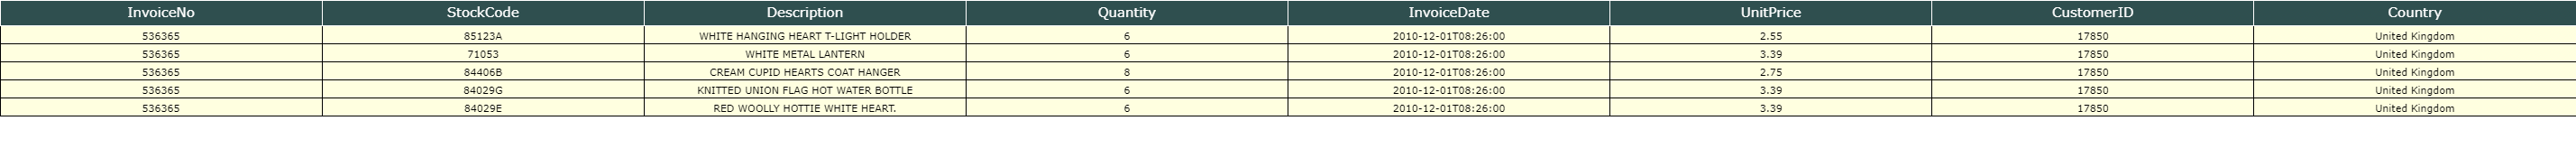

In [6]:
display(Markdown(""" <span style="color:darkgreen; font-style:italic; font-size:15px">  <b>First few rows of the dataset is shown below   </b></span>"""))
vis_data(data.head())

### Drop duplicate rows

In [7]:
print('Original ata shape:{}'.format(data.shape))
data.drop_duplicates(keep = 'first', inplace=True)
print('Data shape after duplicate drop:{}'.format(data.shape))

Original ata shape:(541909, 8)
Data shape after duplicate drop:(536641, 8)


### Formatting

In [8]:
original_cols = data.columns
cols_vis = ' || '.join(original_cols)
print(colored("\nColumn Names (Before Formatting):", 'magenta', attrs = ['bold']),"\n{}".format(cols_vis))

#List of special characters that should not be present
special_chars = r'[?|$|#|@|%|*|(|)|<|>|:|"|{|}|,|.|;|!|^|\|]'

#Lower case and remove white spaces
data.columns = list(map(lambda x:re.sub(special_chars,r'',x.lower().replace(' ','_').replace("'","").replace("|","_")), data.columns))

updated_cols = data.columns
cols_vis = ' || '.join(updated_cols)
print(colored("\nColumn Names (After Formatting):", 'blue', attrs = ['bold']), "\n{}".format(cols_vis))


Column Names (Before Formatting): 
InvoiceNo || StockCode || Description || Quantity || InvoiceDate || UnitPrice || CustomerID || Country

Column Names (After Formatting): 
invoiceno || stockcode || description || quantity || invoicedate || unitprice || customerid || country


## Data Summary

In [9]:
display(Markdown(""" <span style="color:darkgreen; font-style:italic; font-size:15px">  <b>Data type of the loaded dataset is shown below   </b></span>"""))
display(data.dtypes)

cols = data.columns
#Getting the list of numerical features
num_cols = data._get_numeric_data().columns.tolist()
num_cols_vis = ' || '.join(num_cols)
print(colored("Numerical columns:\nCount:", 'magenta', attrs=['bold']),"{}\n{}".format(len(num_cols),num_cols_vis))

#Getting list of categorical features
cat_cols = list(set(cols) - set(num_cols))
cat_cols_vis = ' || '.join(cat_cols)
print(colored("Categorical columns:\nCount:", 'magenta', attrs=['bold']),"{}\n{}".format(len(cat_cols),cat_cols_vis))

 <span style="color:darkgreen; font-style:italic; font-size:15px">  <b>Data type of the loaded dataset is shown below   </b></span>

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
dtype: object

Numerical columns:
Count: 3
quantity || unitprice || customerid
Categorical columns:
Count: 5
country || invoiceno || invoicedate || description || stockcode


In [10]:
cat_cols.remove('invoiceno')
cat_cols

['country', 'invoicedate', 'description', 'stockcode']

#### Numerical columns summary

###### Getting a summary of numerical columns where we see the averages and other representatives of numerical data to help us with feature pre-processing later

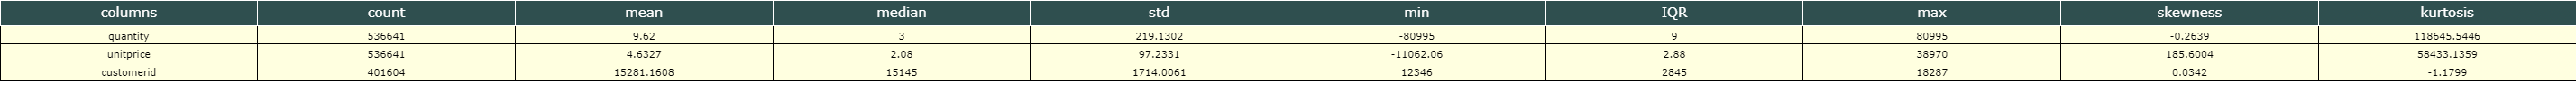

In [11]:
if num_cols == []:
    display(Markdown('__NO NUMERICAL COLUMNS AVAILABLE__'))
else:
    num_desc = data[num_cols].describe().T
    num_desc.insert(loc=5,column='IQR',value = (num_desc['75%']-num_desc['25%']))
    num_desc.drop(['25%','50%','75%'],axis=1,inplace=True)
    
    num_desc['skewness'] = data[num_cols].skew()
    num_desc['kurtosis'] = data[num_cols].kurt()
    num_desc.insert(loc=0, column='columns', value=num_desc.index)
    num_desc.insert(loc=3, column = 'median', value=data[num_cols].median())
    num_desc = num_desc.round(4)
    vis_data(num_desc)


## Numeric features missing value treatment

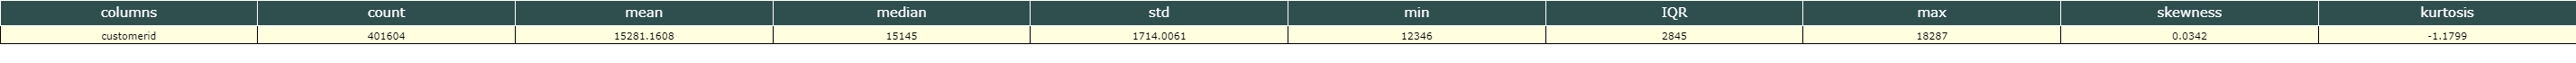

In [12]:
# Filtering out such features with missing data and their important distribution measures

num_desc_mis = num_desc[num_desc['count'] < data.shape[0]]
num_cols_mis = num_desc[num_desc['count'] < data.shape[0]].index.tolist()
vis_data(num_desc_mis)

In [13]:
print("Number of missing customer ids",(541909 - 406829))
print("Number of missing descriptions", (data.description.isna().count()))

Number of missing customer ids 135080
Number of missing descriptions 536641


## Product Category creation

### Data input

In [14]:
data_tBERT = pd.DataFrame(data[~data.description.isna()].description.drop_duplicates(), columns = ['description'])
data_tBERT.shape

(4223, 1)

In [15]:
data_tBERT.description = data_tBERT.description.astype('str')

### Perform sentence embedding

In [16]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import re
import string

# Load the model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Define preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # text = re.sub('[^a-zA-Z0-9]+', '', text)
    
    # Removing extra whitespaces
    cleaned_text = ' '.join(text.split())
    
    return cleaned_text

# Preprocess the text column
data_tBERT['cleaned_description'] = data_tBERT['description'].apply(preprocess_text).astype('str')

# Generate embeddings
embeddings = model.encode(data_tBERT['cleaned_description'].tolist(), convert_to_tensor=True)

# Convert embeddings to a list of lists for DataFrame insertion
embedding_list = embeddings.tolist()

# Add embeddings as a new column to the DataFrame
data_tBERT['embeddings'] = embedding_list

# Print the DataFrame with embeddings
# print(data_tBERT)


In [17]:
data_tBERT.head()

description                  cleaned_description  \
0   WHITE HANGING HEART T-LIGHT HOLDER    white hanging heart tlight holder   
1                  WHITE METAL LANTERN                  white metal lantern   
2       CREAM CUPID HEARTS COAT HANGER       cream cupid hearts coat hanger   
3  KNITTED UNION FLAG HOT WATER BOTTLE  knitted union flag hot water bottle   
4       RED WOOLLY HOTTIE WHITE HEART.        red woolly hottie white heart   

                                          embeddings  
0  [0.4892004430294037, -0.8172405958175659, 0.18...  
1  [0.31407636404037476, -0.7045493125915527, 0.5...  
2  [-0.4702033996582031, -0.05599887669086456, 0....  
3  [0.7467280030250549, -0.3366527259349823, -0.1...  
4  [-0.008980399928987026, -0.9762927293777466, -...

### Clustering to group semantically

In [18]:
from nltk.cluster import KMeansClusterer
import nltk

def clustering_question(datal,NUM_CLUSTERS = 4):

    sentences = datal['description']

    X = np.array(datal['embeddings'].tolist())

    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    datal['cluster'] = pd.Series(assigned_clusters, index=datal.index)
    datal['centroid'] = datal['cluster'].apply(lambda x: kclusterer.means()[x])

    return datal, assigned_clusters

In [19]:
datal, assigned_clusters = clustering_question(data_tBERT)

In [20]:
datal.head()

description                  cleaned_description  \
0   WHITE HANGING HEART T-LIGHT HOLDER    white hanging heart tlight holder   
1                  WHITE METAL LANTERN                  white metal lantern   
2       CREAM CUPID HEARTS COAT HANGER       cream cupid hearts coat hanger   
3  KNITTED UNION FLAG HOT WATER BOTTLE  knitted union flag hot water bottle   
4       RED WOOLLY HOTTIE WHITE HEART.        red woolly hottie white heart   

                                          embeddings  cluster  \
0  [0.4892004430294037, -0.8172405958175659, 0.18...        1   
1  [0.31407636404037476, -0.7045493125915527, 0.5...        2   
2  [-0.4702033996582031, -0.05599887669086456, 0....        2   
3  [0.7467280030250549, -0.3366527259349823, -0.1...        2   
4  [-0.008980399928987026, -0.9762927293777466, -...        1   

                                            centroid  
0  [0.19477536077858512, -0.18691646127669478, 0....  
1  [-0.10966038955412541, -0.11349443005270322, 0...  
2  [-0.10966038955412541, -0.11349443005270322, 0...  
3  [-0.10966038955412541, -0.11349443005270322, 0...  
4  [0.19477536077858512, -0.18691646127669478, 0....

### Visualization

In [21]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'cleaned_description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [22]:
df_produits = pd.DataFrame(datal['cleaned_description'].unique()).rename(columns = {0:'cleaned_description'})

In [23]:
# nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
df_produits.head()

cleaned_description
0    white hanging heart tlight holder
1                  white metal lantern
2       cream cupid hearts coat hanger
3  knitted union flag hot water bottle
4        red woolly hottie white heart

In [25]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Nb of keywords in variable 'cleaned_description': 1616


In [26]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

#### Word occurence matrix

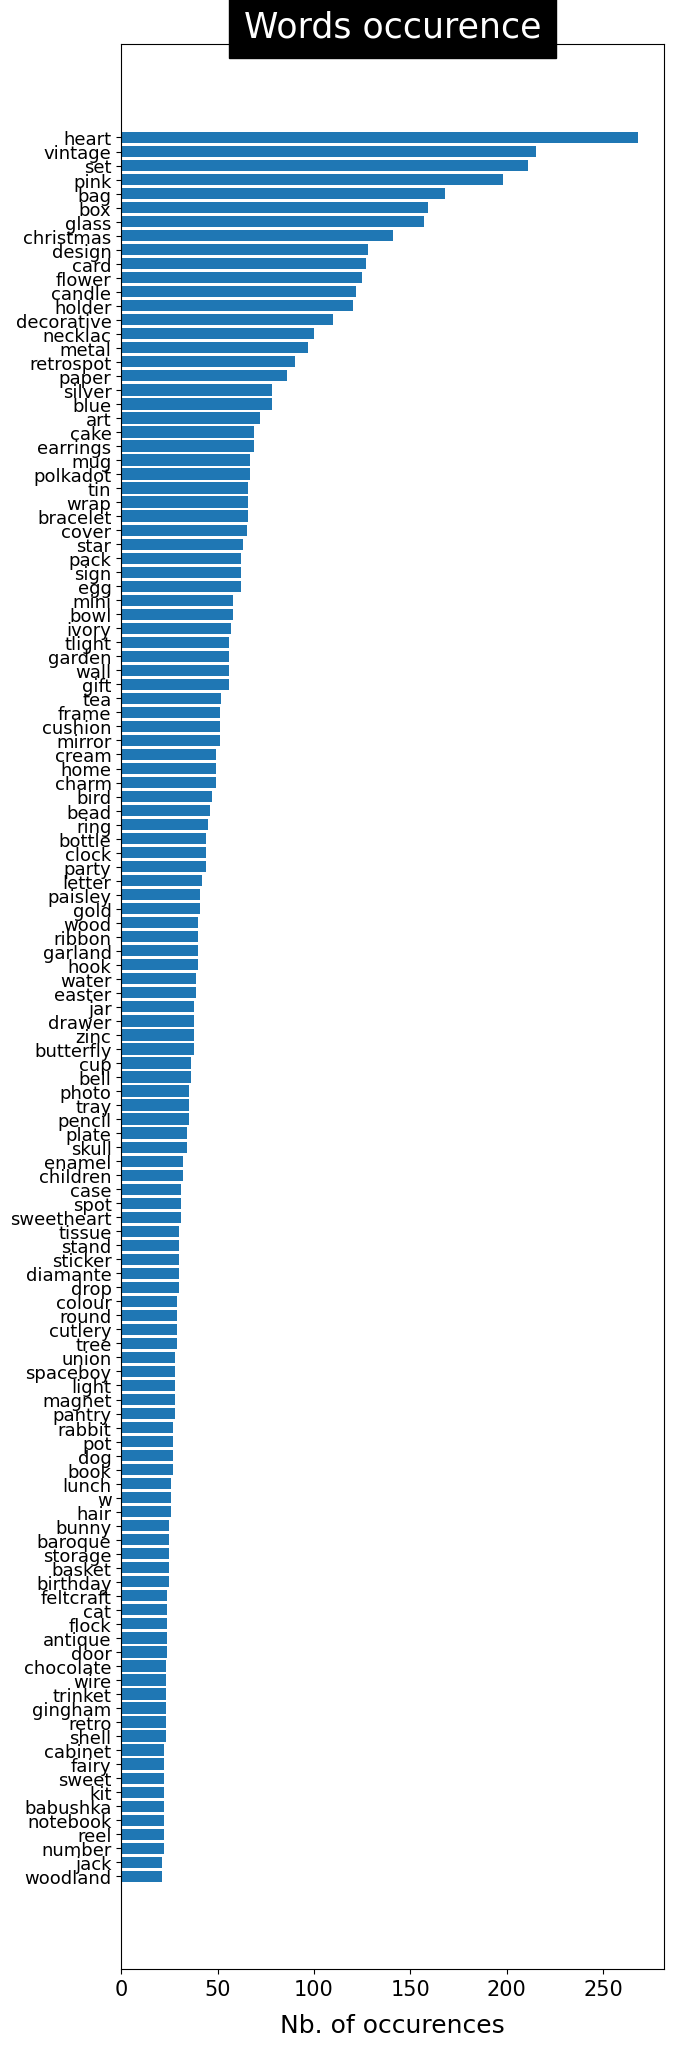

In [27]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [28]:
liste_words = [word for (word, occurence) in list_products]
len(liste_words)

1616

In [29]:
# liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(1,5)]

for i in range(4):
    liste_cluster = datal[datal.cluster==i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.cleaned_description.str.contains(r'(?:\s|^)'+word.lower()+'(?:\s|$)'))

### Word Cloud

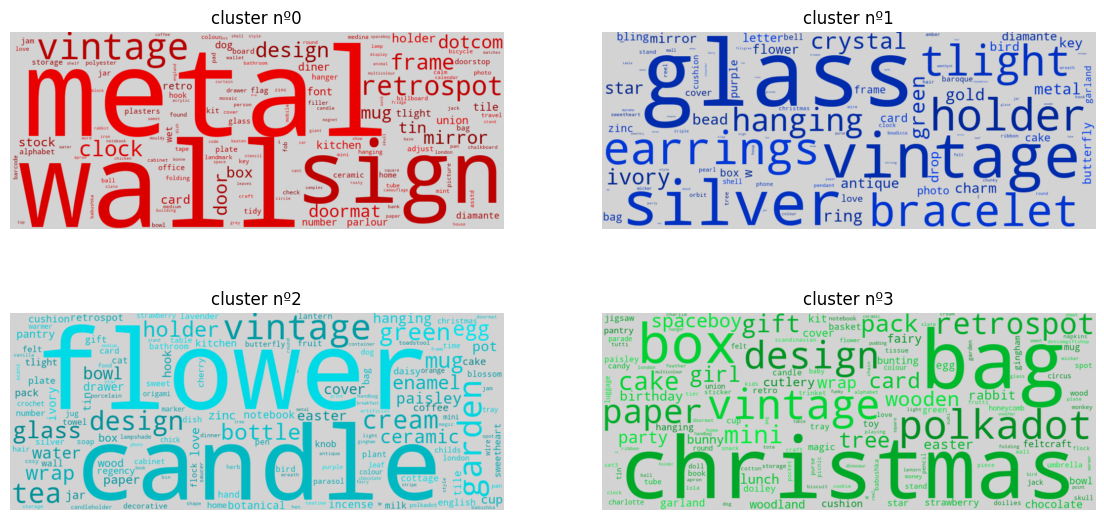

In [30]:
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(4):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    lhl = []
    for key, value in list_cluster_occurences.items():
        lhl.append([key, value])
    lhl.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(lhl, i+1)            


In [39]:
#Based on the wordcloud created, defining the clusters by the following names - 
#Cluster 0 -  home_decor
# Cluster 1 - ornaments
# Cluster 2 - home_essentials
# Cluster 3 - gift

#Adding a new column called department to categorize this

In [31]:
datal.head()

description                  cleaned_description  \
0   WHITE HANGING HEART T-LIGHT HOLDER    white hanging heart tlight holder   
1                  WHITE METAL LANTERN                  white metal lantern   
2       CREAM CUPID HEARTS COAT HANGER       cream cupid hearts coat hanger   
3  KNITTED UNION FLAG HOT WATER BOTTLE  knitted union flag hot water bottle   
4       RED WOOLLY HOTTIE WHITE HEART.        red woolly hottie white heart   

                                          embeddings  cluster  \
0  [0.4892004430294037, -0.8172405958175659, 0.18...        1   
1  [0.31407636404037476, -0.7045493125915527, 0.5...        2   
2  [-0.4702033996582031, -0.05599887669086456, 0....        2   
3  [0.7467280030250549, -0.3366527259349823, -0.1...        2   
4  [-0.008980399928987026, -0.9762927293777466, -...        1   

                                            centroid  
0  [0.19477536077858512, -0.18691646127669478, 0....  
1  [-0.10966038955412541, -0.11349443005270322, 0...  
2  [-0.10966038955412541, -0.11349443005270322, 0...  
3  [-0.10966038955412541, -0.11349443005270322, 0...  
4  [0.19477536077858512, -0.18691646127669478, 0....

In [32]:
datal['department'] = 'Unknown'
datal.loc[datal['cluster'] == 0, 'department'] = 'home_decor'
datal.loc[datal['cluster'] == 1, 'department'] = 'ornaments'
datal.loc[datal['cluster'] == 2, 'department'] = 'home_essentials'
datal.loc[datal['cluster'] == 3, 'department'] = 'gift'

datal.head()

description                  cleaned_description  \
0   WHITE HANGING HEART T-LIGHT HOLDER    white hanging heart tlight holder   
1                  WHITE METAL LANTERN                  white metal lantern   
2       CREAM CUPID HEARTS COAT HANGER       cream cupid hearts coat hanger   
3  KNITTED UNION FLAG HOT WATER BOTTLE  knitted union flag hot water bottle   
4       RED WOOLLY HOTTIE WHITE HEART.        red woolly hottie white heart   

                                          embeddings  cluster  \
0  [0.4892004430294037, -0.8172405958175659, 0.18...        1   
1  [0.31407636404037476, -0.7045493125915527, 0.5...        2   
2  [-0.4702033996582031, -0.05599887669086456, 0....        2   
3  [0.7467280030250549, -0.3366527259349823, -0.1...        2   
4  [-0.008980399928987026, -0.9762927293777466, -...        1   

                                            centroid       department  
0  [0.19477536077858512, -0.18691646127669478, 0....        ornaments  
1  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  
2  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  
3  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  
4  [0.19477536077858512, -0.18691646127669478, 0....        ornaments

In [33]:
#Merge it back to the main table with the department labels

data_vf = data.merge(datal, how = 'left', on = 'description', copy=False)
data_vf.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

                   cleaned_description  \
0    white hanging heart tlight holder   
1                  white metal lantern   
2       cream cupid hearts coat hanger   
3  knitted union flag hot water bottle   
4        red woolly hottie white heart   

                                          embeddings  cluster  \
0  [0.4892004430294037, -0.8172405958175659, 0.18...      1.0   
1  [0.31407636404037476, -0.7045493125915527, 0.5...      2.0   
2  [-0.4702033996582031, -0.05599887669086456, 0....      2.0   
3  [0.7467280030250549, -0.3366527259349823, -0.1...      2.0   
4  [-0.008980399928987026, -0.9762927293777466, -...      1.0   

                                            centroid       department  
0  [0.19477536077858512, -0.18691646127669478, 0....        ornaments  
1  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  
2  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  
3  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  
4  [0.19477536077858512, -0.18691646127669478, 0....        ornaments

In [34]:
#Creating sales column as unitprice*quantity

data_vf['sales'] = data_vf['quantity']*data_vf['unitprice']

In [35]:
dict_prod = {}

for i in range(4):
    temp_dict_prod = {}
    temp_prod = data_vf[data_vf.cluster == i]
    temp_prod_grouped = temp_prod.groupby('description')['sales'].aggregate('sum').round(2).reset_index()
    temp_dict_prod = dict(zip(temp_prod_grouped['description'], temp_prod_grouped['sales'])) 
    temp_dict_prod = dict(sorted(temp_dict_prod.items(), key=lambda x:x[1], reverse = True))
    dict_prod[i] = temp_dict_prod
# 
# dict_prod.sort_values(on=

# print(dict_prod)

## Product Sales Distribution per cluster

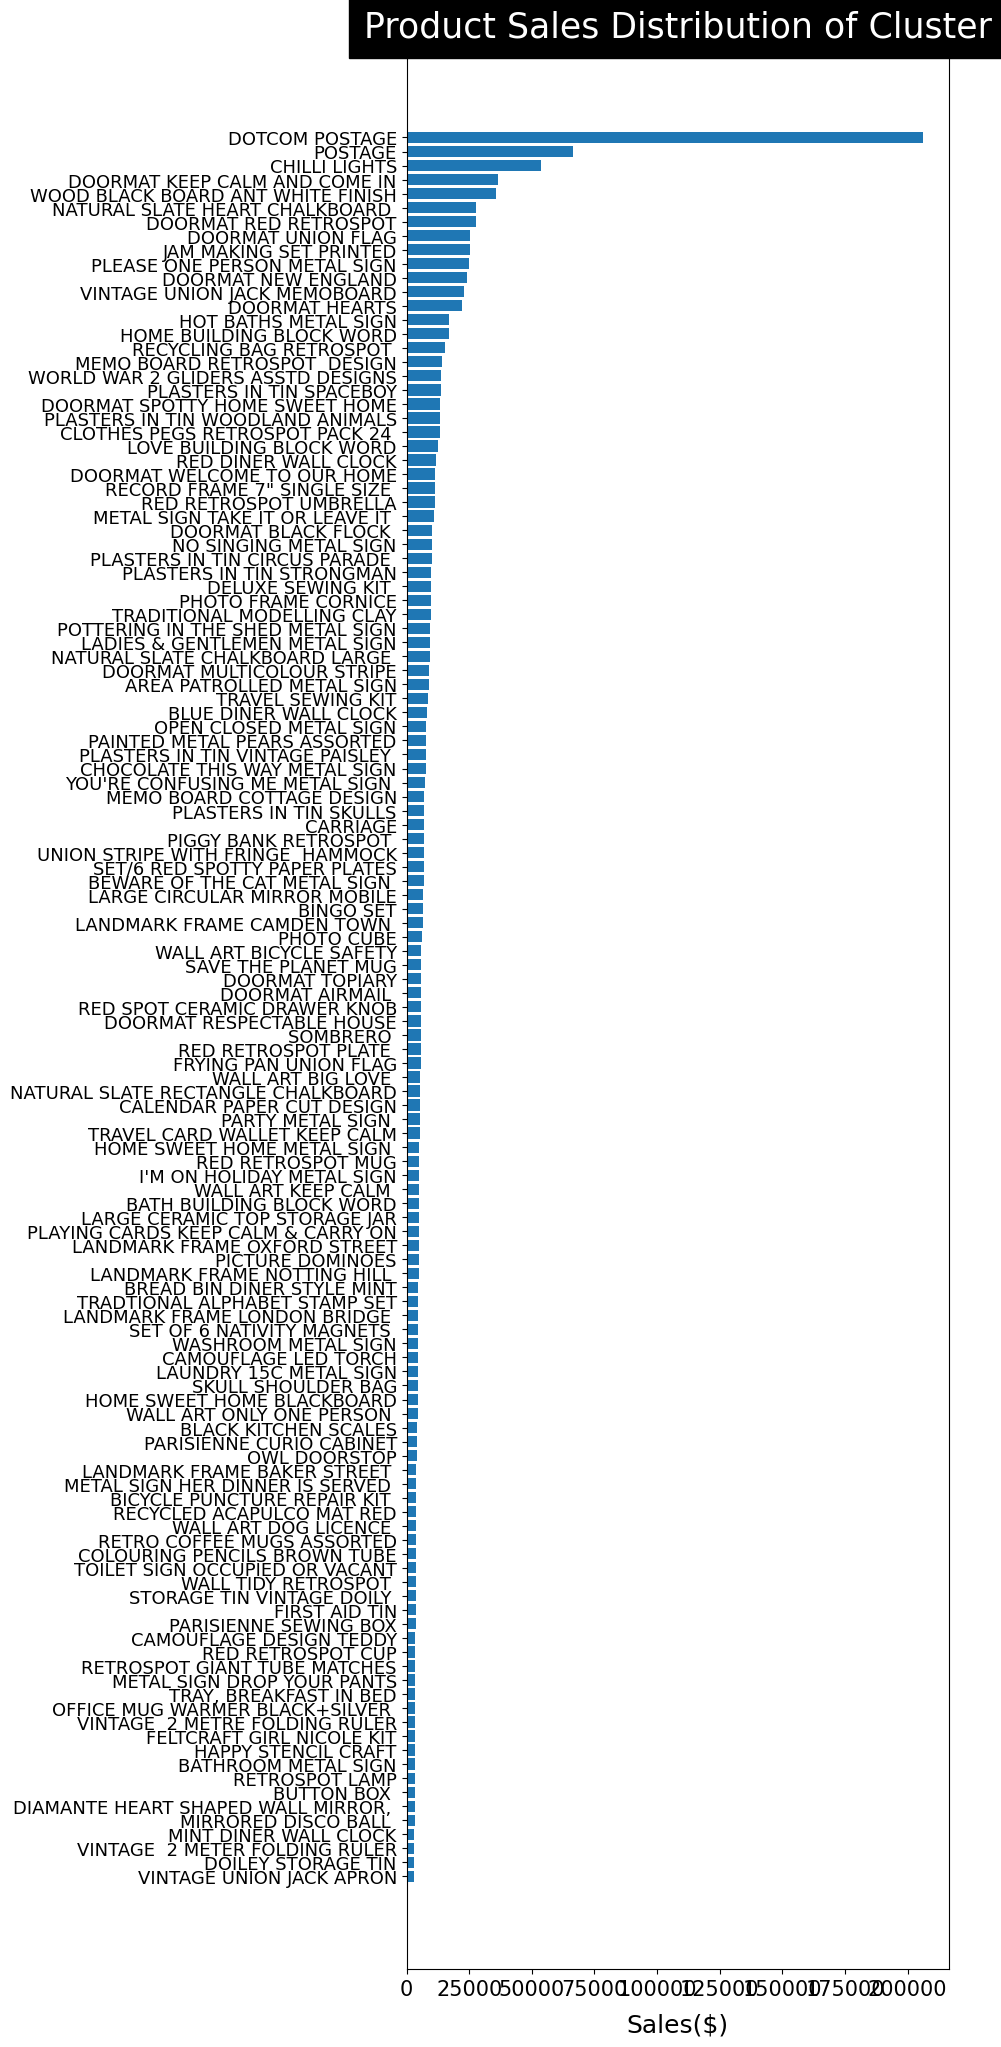

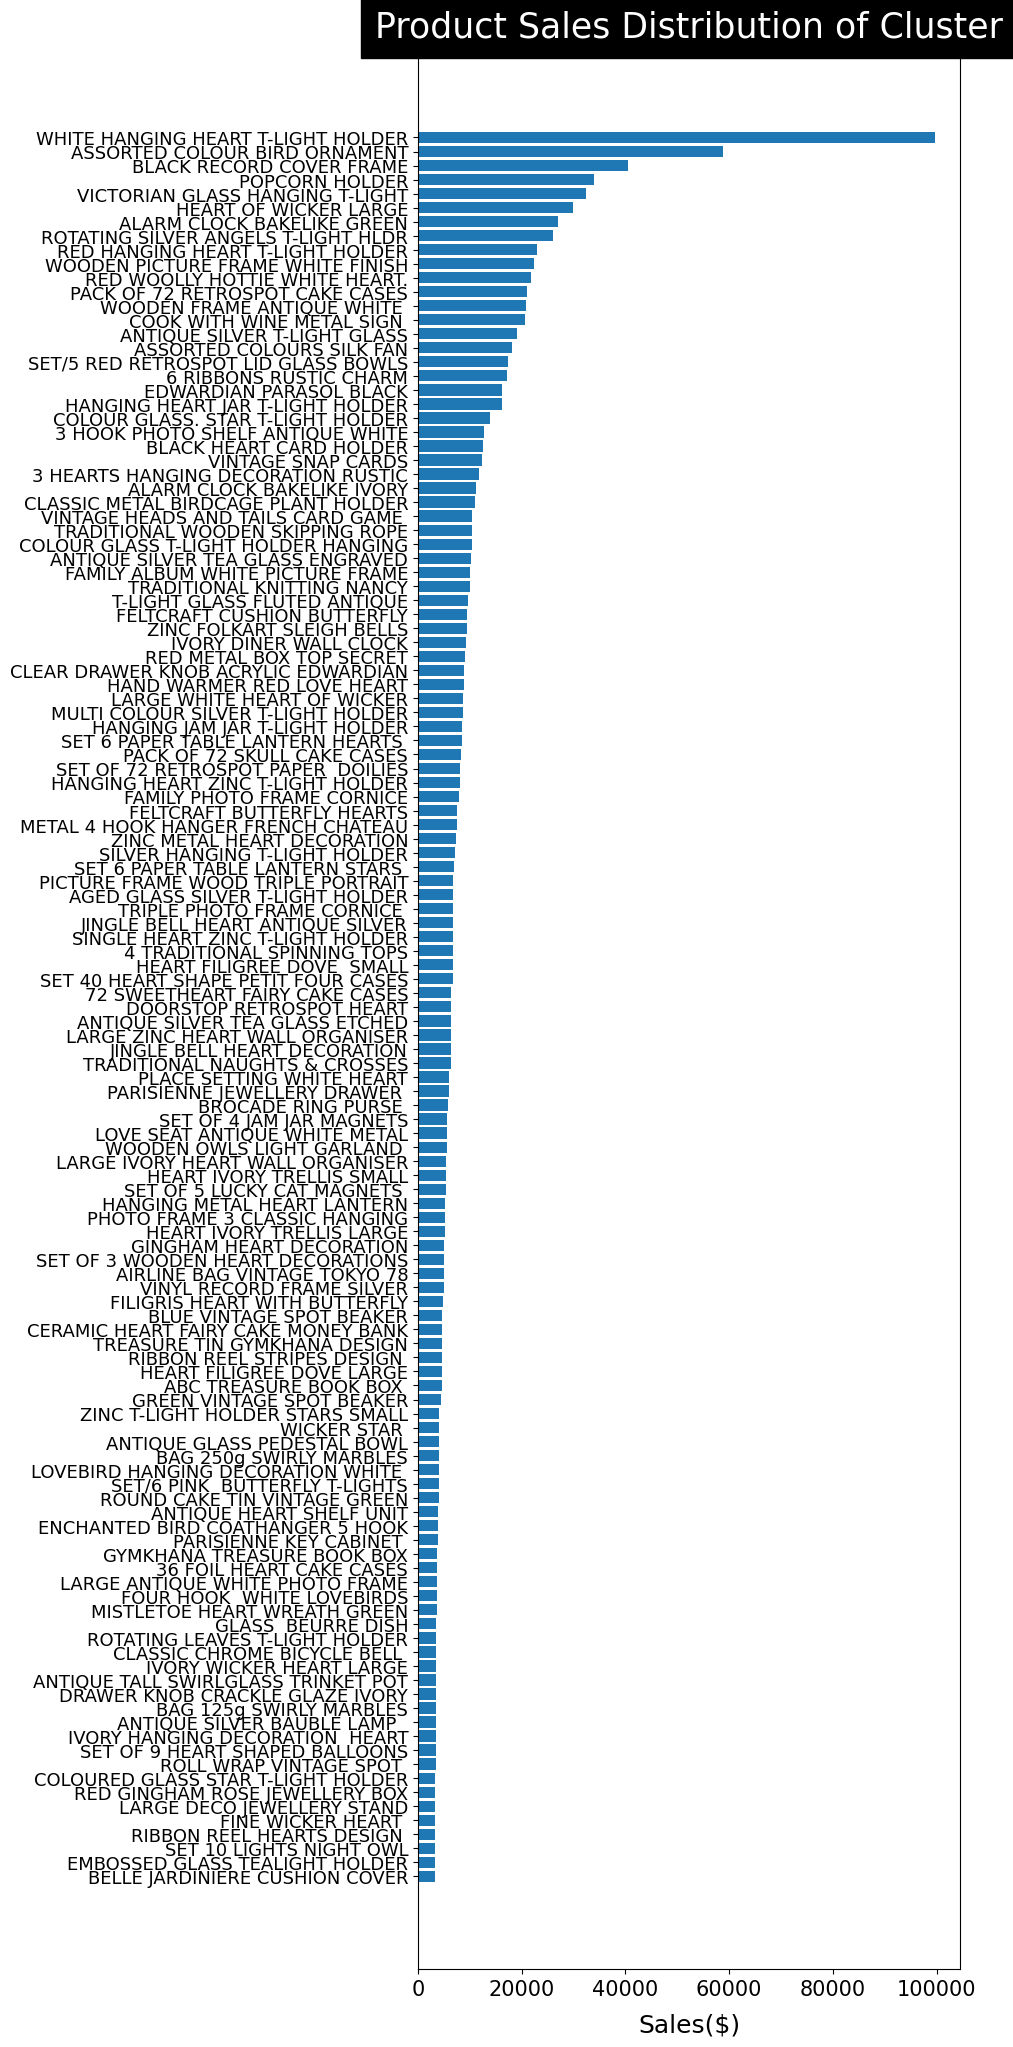

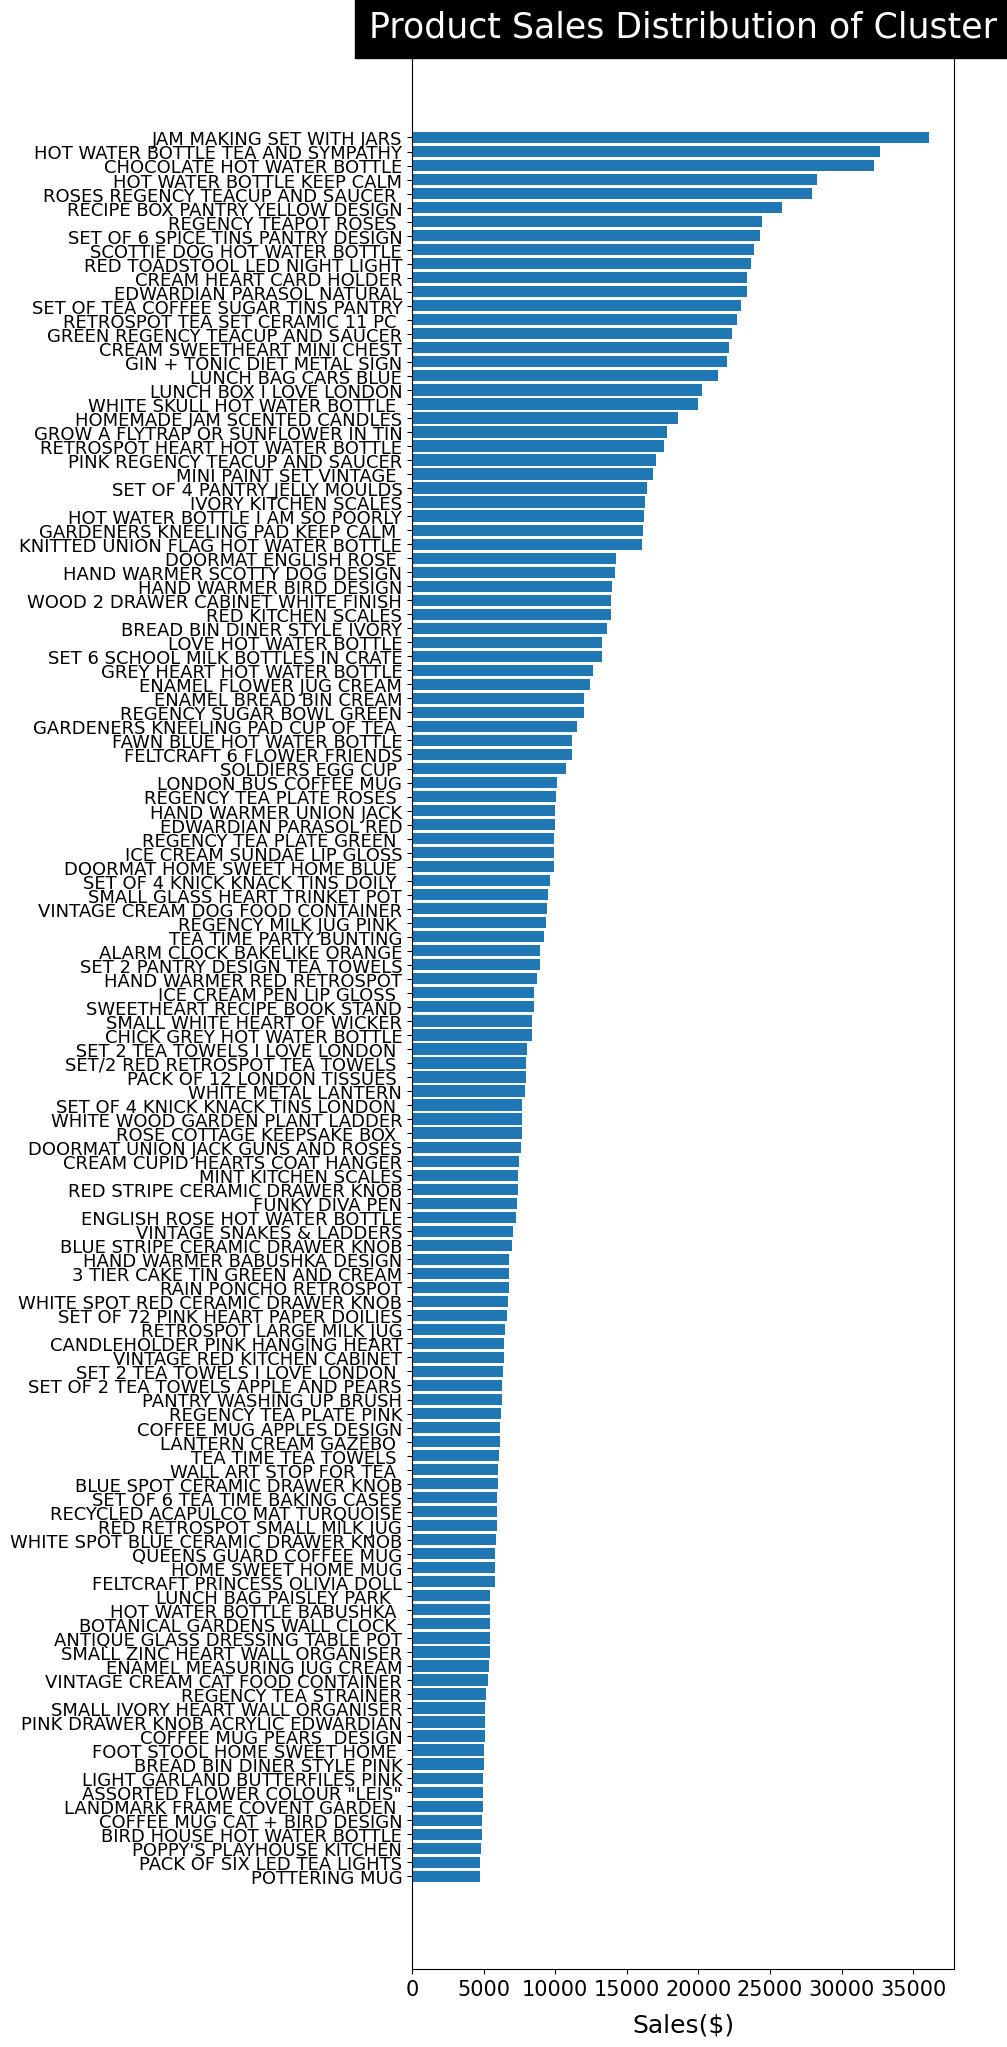

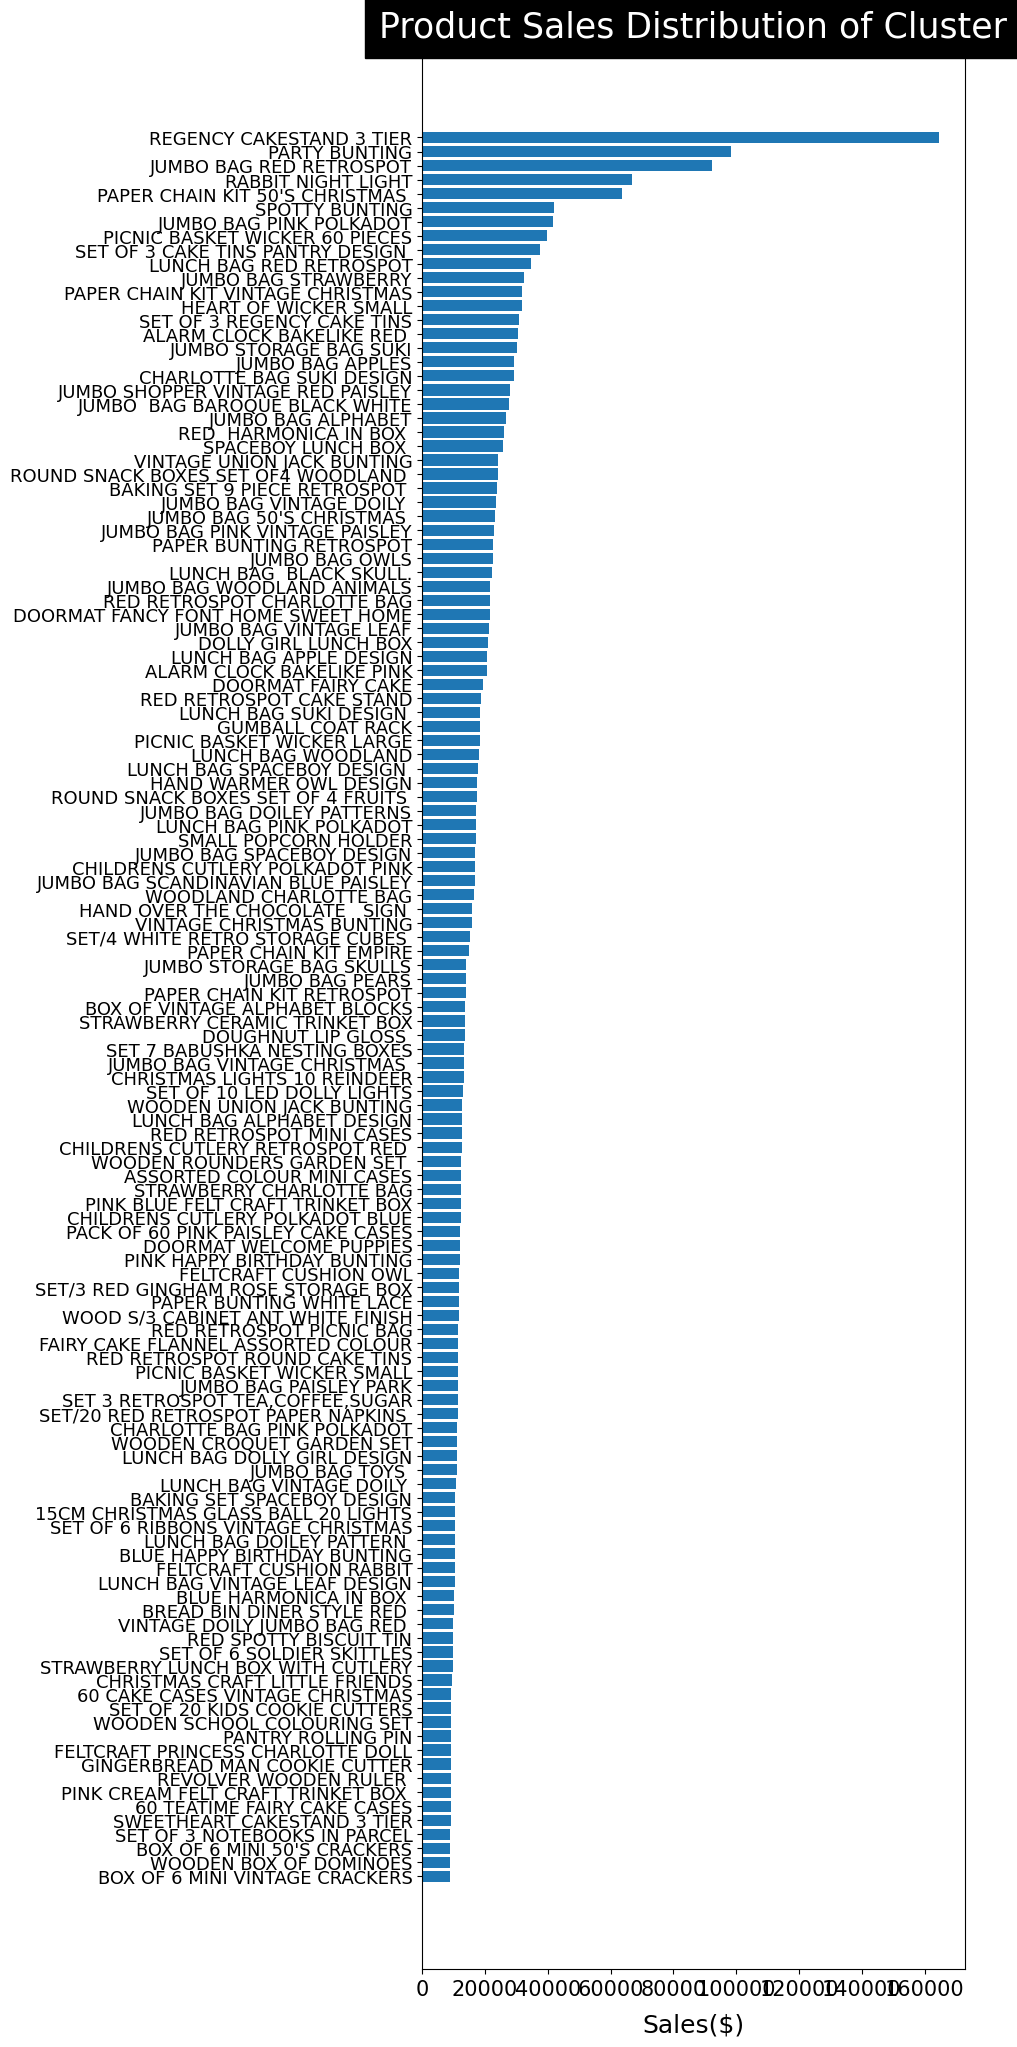

In [36]:
for i in range(4):
    plot_prod = list(map(list, dict_prod[i].items()))
    
    plt.rc('font', weight='normal')
    fig, ax = plt.subplots(figsize=(7, 25))
    # if i==0:
    #     pass
    # else:
    #     fig.add_subplot(2,2,2)
    y_axis = [i[1] for i in plot_prod[:125]]
    x_axis = [k for k,i in enumerate(plot_prod[:125])]
    x_label = [i[0] for i in plot_prod[:125]]
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 13)
    plt.yticks(x_axis, x_label)
    plt.xlabel("Sales($)", fontsize = 18, labelpad = 10)
    ax.barh(x_axis, y_axis, align = 'center')
    ax = plt.gca()
    ax.invert_yaxis()
    
    plt.title("Product Sales Distribution of Cluster",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
    plt.show()

In [38]:
data_vf.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

                   cleaned_description  \
0    white hanging heart tlight holder   
1                  white metal lantern   
2       cream cupid hearts coat hanger   
3  knitted union flag hot water bottle   
4        red woolly hottie white heart   

                                          embeddings  cluster  \
0  [0.4892004430294037, -0.8172405958175659, 0.18...      1.0   
1  [0.31407636404037476, -0.7045493125915527, 0.5...      2.0   
2  [-0.4702033996582031, -0.05599887669086456, 0....      2.0   
3  [0.7467280030250549, -0.3366527259349823, -0.1...      2.0   
4  [-0.008980399928987026, -0.9762927293777466, -...      1.0   

                                            centroid       department  sales  \
0  [0.19477536077858512, -0.18691646127669478, 0....        ornaments  15.30   
1  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  20.34   
2  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  22.00   
3  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  20.34   
4  [0.19477536077858512, -0.18691646127669478, 0....        ornaments  20.34   

  pur_ret_flg  
0           P  
1           P  
2           P  
3           P  
4           P

## Data Preparation for Customer Clustering

In [39]:
#Dropping the null customer ids from the records since they cant be tracked
data_vf_cust_unknown = data_vf[data_vf.customerid.isna()]
data_vf_cust_unknown.head()

data_vf = data_vf[~data_vf.customerid.isna()]

#We notice there are some records where sales is 0
#We also notice there are certain InvoiceNos that start with 'C' indicating cancelled records
#Hence adding a flag for both to mark these ase 'R'eturns and others as 'P'urchases

# data_vf['pur_ret_flg'] = 'P'
# data_vf.loc[data_vf.invoiceno.str.startswith('C', na=False), 'pur_ret_flg'] = 'R'
# data_vf.loc[data_vf['sales'] == 0, 'pur_ret_flg'] = 'R'


data_vf.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

                   cleaned_description  \
0    white hanging heart tlight holder   
1                  white metal lantern   
2       cream cupid hearts coat hanger   
3  knitted union flag hot water bottle   
4        red woolly hottie white heart   

                                          embeddings  cluster  \
0  [0.4892004430294037, -0.8172405958175659, 0.18...      1.0   
1  [0.31407636404037476, -0.7045493125915527, 0.5...      2.0   
2  [-0.4702033996582031, -0.05599887669086456, 0....      2.0   
3  [0.7467280030250549, -0.3366527259349823, -0.1...      2.0   
4  [-0.008980399928987026, -0.9762927293777466, -...      1.0   

                                            centroid       department  sales  \
0  [0.19477536077858512, -0.18691646127669478, 0....        ornaments  15.30   
1  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  20.34   
2  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  22.00   
3  [-0.10966038955412541, -0.11349443005270322, 0...  home_essentials  20.34   
4  [0.19477536077858512, -0.18691646127669478, 0....        ornaments  20.34   

  pur_ret_flg  
0           P  
1           P  
2           P  
3           P  
4           P

### We tend to devise the marketing strategy per department. Hence we will modularize our code in such a way that it can be called iteratively for each department

In [126]:
class CustomerClustering:
    def __init__(self, data_vff):
        self.data_vff = data_vff
        self.cluster_column = 'cluster'

    def feature_engineering(self, data_vff, fe='y'):
        if fe=='y':
            data_vff = data_vff.groupby(['customerid','invoicedate']).aggregate({'quantity':'sum','sales':'sum'}).reset_index()
        
            # Number of Transactions
            data_vff['num_transactions'] = data_vff.groupby('customerid')['invoicedate'].transform('count')
            
            # Days Between Transactions
            data_vff['days_between_transactions'] = data_vff.groupby('customerid')['invoicedate'].diff().dt.days
            
            # Purchase Cycle
            data_vff['purchase_cycle'] = data_vff.groupby('customerid', as_index=False)['days_between_transactions'].transform(lambda x: x.median(skipna=True))
            
            # Total Spending
            data_vff['total_spending'] = data_vff.groupby('customerid')['sales'].transform('sum')
            
            # Average Transaction Value
            data_vff['avg_transaction_value'] = data_vff.groupby('customerid')['sales'].transform('mean')
            
            # Largest Transaction Value
            data_vff['largest_transaction_value'] = data_vff.groupby('customerid')['sales'].transform('max')
        
            # Total Quantity Purchased
            data_vff['total_quantity'] = data_vff.groupby('customerid')['quantity'].transform('sum')
            
            # Average Quantity per Transaction
            data_vff['avg_quantity_per_transaction'] = data_vff.groupby('customerid')['quantity'].transform('mean')
            
            # Last Purchase Recency
            data_vff['last_purchase_recency'] = (pd.Timestamp.now() - data_vff.groupby('customerid')['invoicedate'].transform('max')).dt.days
            
            # Time Since First Purchase
            data_vff['time_since_first_purchase'] = (pd.Timestamp.now() - data_vff.groupby('customerid')['invoicedate'].transform('min')).dt.days
            
            # Purchase Patterns
            data_vff['purchase_day'] = data_vff['invoicedate'].dt.dayofweek
            data_vff['purchase_hour'] = data_vff['invoicedate'].dt.hour
            
            # Repeat Purchase Rate
            data_vff['repeat_purchase_rate'] = data_vff.groupby('customerid')['num_transactions'].transform(lambda x: (x > 1).mean() * 100)
            
            # Monthly Purchase Variation
            data_vff['purchase_month'] = data_vff['invoicedate'].dt.month
        
            cust_data = data_vff.groupby('customerid', as_index=False).aggregate({'quantity':'sum','sales':'sum','num_transactions':'mean','purchase_cycle':'mean','total_spending':'mean','avg_transaction_value':'mean','largest_transaction_value':'mean','total_quantity':'mean','avg_quantity_per_transaction':'mean','last_purchase_recency':'mean','time_since_first_purchase':'mean','repeat_purchase_rate':'mean'})
            
            cust_data['days_between_transactions'] = data_vff.groupby('customerid', as_index=False)['days_between_transactions'].agg(lambda x:x.median(skipna=True))['days_between_transactions']
            
            cust_mon = pd.get_dummies(data_vff[['customerid','purchase_month']], columns=['purchase_month'], prefix='month')
            cust_mon = cust_mon.groupby('customerid').sum().reset_index()
            
            cust_dy = pd.get_dummies(data_vff[['customerid','purchase_day']], columns=['purchase_day'], prefix='day')
            cust_dy = cust_dy.groupby('customerid').sum().reset_index()
            
            data_vff['txn_time'] = '100'
            data_vff.loc[((data_vff['purchase_hour'] >=0) & (data_vff['purchase_hour'] <=4)) , 'txn_time'] = '0_4'
            data_vff.loc[((data_vff['purchase_hour'] >=5) & (data_vff['purchase_hour'] <=8)) , 'txn_time'] = '5_8'
            data_vff.loc[((data_vff['purchase_hour'] >=9) & (data_vff['purchase_hour'] <=12)) , 'txn_time'] = '9_12'
            data_vff.loc[((data_vff['purchase_hour'] >=13) & (data_vff['purchase_hour'] <=16)) , 'txn_time'] = '13_16'
            data_vff.loc[((data_vff['purchase_hour'] >=17) & (data_vff['purchase_hour'] <=20)) , 'txn_time'] = '17_20'
            data_vff.loc[((data_vff['purchase_hour'] >=21) & (data_vff['purchase_hour'] <=24)) , 'txn_time'] = '21_24'
        
        
            cust_txn_time = pd.get_dummies(data_vff[['customerid','txn_time']], columns=['txn_time'], prefix='txn_time_bw')
            cust_txn_time = cust_txn_time.groupby('customerid').sum().reset_index()
            
            cust_data = cust_data.merge(cust_mon, how = 'left', on='customerid', copy = False)
            
            cust_data = cust_data.merge(cust_dy, how = 'left', on='customerid', copy = False).merge(cust_txn_time, how = 'left', on='customerid', copy = False)
            
            # Number of Unique Items
            cust_unq_item = data_vf[data_vf.pur_ret_flg == 'P'].groupby('customerid', as_index=False)['description'].aggregate('nunique')
            cust_unq_item = cust_unq_item.rename({'description':'dist_prod_cnt'})
            
            # Number of Different Categories
            cust_unq_item['dist_dept_cnt'] = data_vf[data_vf.pur_ret_flg == 'P'].groupby('customerid', as_index=False)['department'].aggregate('nunique')['department']
            
            cust_data = cust_data.merge(cust_unq_item, how = 'left', on='customerid', copy = False)
            self.cust_data = copy.deepcopy(cust_data.fillna(299))
        else:
            self.cust_data = copy.deepcopy(data_vff)
        return self.cust_data
        
    def std_scale(self):
        # Standardize the data and return cust_data_scaled dataframe
        col_to_exclude = self.cust_data['customerid']
        scaler = StandardScaler()
        self.cust_data_scaled = pd.DataFrame(scaler.fit_transform(self.cust_data.drop(['customerid'],axis=1)), columns=list(set(self.cust_data.columns)-set(['customerid'])))
        self.cust_data_scaled['customerid'] = col_to_exclude.values

    def KDE_plot(self):
        KDE(self.cust_data_scaled)

    def find_optimal_num_clusters(self, clust_data, method='kmeans'):
        if method == 'kmeans':
            # Find optimal number of clusters using silhouette score for K-Means
            silhouette_scores = []
            for num_clusters in range(2, 11):
                kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
                labels = kmeans.fit_predict(clust_data)
                silhouette_scores.append(silhouette_score(clust_data, labels))
            return np.argmax(silhouette_scores) + 2  # Adding 2 to get the actual number of clusters
        elif method == 'hierarchical':
            # Find optimal number of clusters for hierarchical clustering using your preferred method
            # For example, you can use dendrogram or other metrics
            # Replace the code below with your implementation
            linkage_scores = []
            for num_clusters in range(2, 11):
                model = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')
                labels = model.fit_predict(clust_data)
                Z = linkage(clust_data, method='average')
                
                # Extract the average linkage score for the current number of clusters
                linkage_score = Z[-num_clusters + 1, 2]  # The -num_clusters + 1 index corresponds to the average linkage score
                linkage_scores.append(linkage_score)
            return np.argmax(linkage_scores) + 2  # Adding 2 to get the actual number of clusters
        elif method == 'dbscan':
            k_distances = []
            for num_neighbors in range(1, 10 + 1):
                distances = pairwise_distances(clust_data)
                avg_distance = np.mean(np.sort(distances, axis=1)[:, -num_neighbors + 1], axis=0)
                k_distances.append(avg_distance)
            
            plt.plot(range(1, 10 + 1), k_distances, marker='o')
            plt.xlabel("Number of Neighbors")
            plt.ylabel("Average Distance to the Nearest Neighbor")
            plt.title("K-Distance Plot for Optimal Epsilon (eps)")
            plt.show()
            
            # Find the "elbow" point as the optimal number of neighbors (n)
            optimal_n = np.argmax(np.diff(k_distances)) + 2
            
            # Use the optimal n to calculate the optimal eps
            optimal_eps = np.mean(np.sort(pairwise_distances(clust_data), axis=1)[:, -optimal_n + 1])
            
            print("Optimal number of neighbors (min_samples):", optimal_n)
            print("Optimal epsilon (eps):", optimal_eps)
            
            return optimal_eps, optimal_n
        elif method == 'kmedoids':
            # Find optimal number of clusters for K-Medoids using your preferred method
            # For example, you can use silhouette score or other metrics
            # Replace the code below with your implementation
            silhouette_scores = []
            for num_clusters in range(2, 11):
                model = KMedoids(n_clusters=num_clusters, random_state=0)
                labels = model.fit_predict(clust_data)
                silhouette_scores.append(silhouette_score(clust_data, labels))
            
            # Calculate distortion for a range of cluster numbers
            distortions = []
            K_range = range(2, 11)
            for k in K_range:
                kmedoids = KMedoids(n_clusters=k, random_state=0)
                kmedoids.fit(clust_data)
                distortions.append(kmedoids.inertia_)
            
            # Plot the elbow curve
            plt.plot(K_range, distortions, marker='o')
            plt.xlabel('Number of Clusters')
            plt.ylabel('Distortion')
            plt.title('K-Medoids Elbow Curve')
            plt.show()
    
            return np.argmax(silhouette_scores) + 2  # Adding 2 to get the actual number of clusters

    def tSNE_visualization(self):
        # Assuming 'segmented' is your DataFrame with the 'cluster' column
        cluster_vis_data = self.cluster_data
        X_scaled = cluster_vis_data.drop(['cluster','customerid'], axis=1)  # Exclude the 'cluster' column
        cluster_labels = cluster_vis_data['cluster'].values
        
        # Apply t-SNE to reduce dimensionality to 2D
        tsne = TSNE(n_components=2, random_state=0)
        X_tsne = tsne.fit_transform(X_scaled)
        
        # Visualize the clusters using t-SNE
        unique_labels = np.unique(cluster_labels)
        colors = plt.cm.get_cmap('viridis', len(unique_labels))
        
        for label, color in zip(unique_labels, colors.colors):
            if label == -1:
                # Noise points are plotted in black
                color = [0, 0, 0, 1]
            class_member_mask = (cluster_labels == label)
            xy = X_tsne[class_member_mask]
            plt.scatter(xy[:, 0], xy[:, 1], c=[color], label=f'Cluster {label}', edgecolors='k', s=50)
        
        plt.legend()
        plt.title('DBSCAN Clustering Visualization (t-SNE)')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.show()

    
    def perform_customer_segmentation(self, clustering_technique, fe='y'):
        # Feature engineering
        self.cust_data = copy.deepcopy(self.feature_engineering(self.data_vff,fe))
        
        self.std_scale()
        self.cluster_data = copy.deepcopy(self.cust_data_scaled)
        
        # Initialize and fit the clustering algorithm based on user choice
        if clustering_technique == 'kmeans':
            num_clusters = self.find_optimal_num_clusters(self.cluster_data.loc[:, self.cluster_data.columns != "customerid"], method='kmeans')
            clustering_model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
        elif clustering_technique == 'hierarchical':
            num_clusters = self.find_optimal_num_clusters(self.cluster_data.loc[:, self.cluster_data.columns != "customerid"], method='hierarchical')
            clustering_model = AgglomerativeClustering(n_clusters=num_clusters)
        elif clustering_technique == 'dbscan':
            optimal_eps, optimal_n = self.find_optimal_num_clusters(self.cluster_data.loc[:, self.cluster_data.columns != "customerid"], method='dbscan')
            # optimal_eps, optimal_n = 2.5, 10
            clustering_model = DBSCAN(eps=optimal_eps, min_samples=optimal_n)
        elif clustering_technique == 'kmedoids':
            # x = cluster_data.loc[:, cluster_data.columns != "customerid"]
            # kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
            # kmeans.fit(x)
            # initial_centroids = kmeans.cluster_centers_
            
            # # Find the closest actual data points to the initial centroids
            # closest_points_indices = np.argmin(np.linalg.norm(x[:, np.newaxis] - initial_centroids, axis=2), axis=1)
            # closest_points = x[closest_points_indices]
    
            num_clusters = self.find_optimal_num_clusters(self.cluster_data.loc[:, self.cluster_data.columns != "customerid"], method='kmedoids')
            # num_clusters = 4
            clustering_model = KMedoids(n_clusters=num_clusters, random_state=0)
        else:
            raise ValueError("Invalid clustering technique specified.")
        
        # Fit the clustering model and obtain cluster assignments
        self.cluster_data['cluster'] = clustering_model.fit_predict(self.cluster_data.loc[:, self.cluster_data.columns != "customerid"])

        self.tSNE_visualization()
        
        return self.cust_data.merge(self.cluster_data[['customerid','cluster']], how = 'inner', copy = False, on = 'customerid'), self.cluster_data


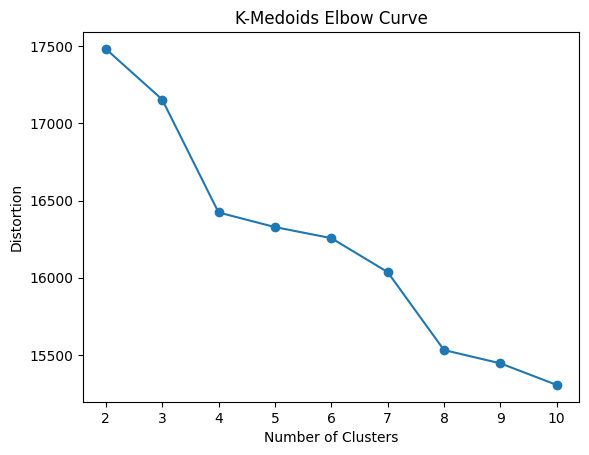

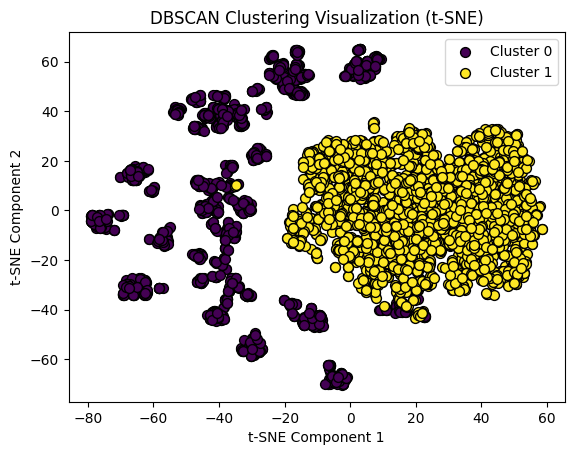

In [127]:
#Dropping the null customer ids from the records since they cant be tracked
# data_vf_cust_unknown = data_vf[data_vf.customerid.isna()]
# data_vf_cust_unknown.head()

# data_vf = data_vf[~data_vf.customerid.isna()]

#We notice there are some records where sales is 0
#We also notice there are certain InvoiceNos that start with 'C' indicating cancelled records
#Hence adding a flag for both to mark these ase 'R'eturns and others as 'P'urchases

# data_vf['pur_ret_flg'] = 'P'
# data_vf.loc[data_vf.invoiceno.str.startswith('C', na=False), 'pur_ret_flg'] = 'R'
# data_vf.loc[data_vf['sales'] == 0, 'pur_ret_flg'] = 'R'

data_vf = data_vf[['invoiceno','stockcode','description','quantity','invoicedate','unitprice','customerid','country','cleaned_description','department','sales','pur_ret_flg']]
data_vf = data_vf[data_vf.pur_ret_flg == 'P']

cluster_creation_obj_ornmaents = CustomerClustering(data_vf[data_vf.department == 'ornaments'])
segmented_data_ornaments, segmented_data_ornaments_scaled = cluster_creation_obj_ornmaents.perform_customer_segmentation('kmedoids','y')

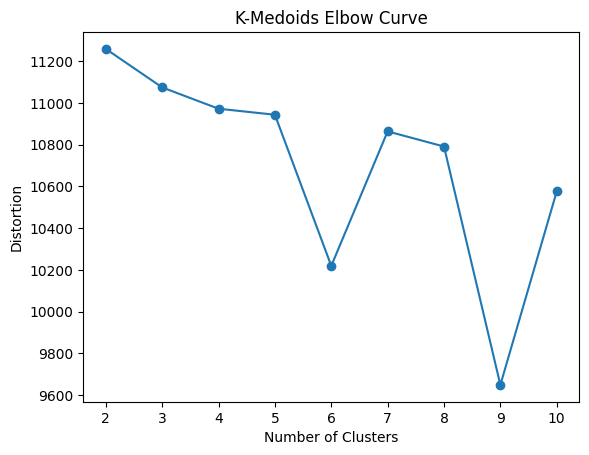

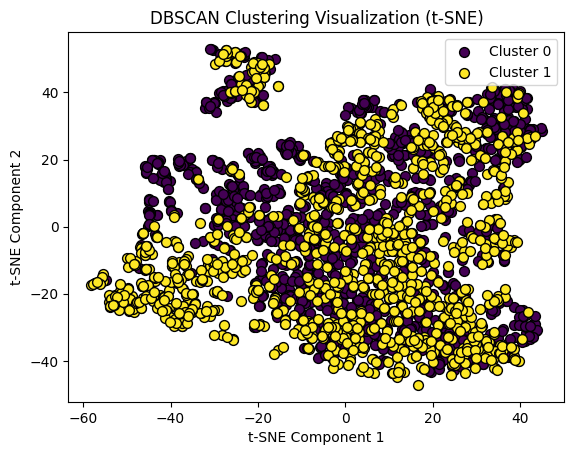

In [128]:
cluster_creation_obj_ornmaents_clust_1 = CustomerClustering(segmented_data_ornaments[segmented_data_ornaments.cluster == 1].drop(['cluster'],axis=1))
segmented_data_ornaments_clust_1, segmented_data_ornaments_scaled_clust_1 = cluster_creation_obj_ornmaents_clust_1.perform_customer_segmentation('kmedoids','n')

In [130]:
# segmented_data_ornaments_clust_1.head()
# segmented_data_ornaments_scaled_clust_1.cluster.value_counts()
# segmented_data_ornaments_clust_1, segmented_data_ornaments_scaled_clust_1
segmented_data_ornaments_scaled_clust_1['cluster'] =  segmented_data_ornaments_scaled_clust_1['cluster'].map({0:2,1:1})

segmented_data_ornaments_clust_1['cluster'] =  segmented_data_ornaments_clust_1['cluster'].map({0:2,1:1})
segmented_data_ornaments_clust_1.cluster.value_counts()

cluster
2    1200
1    1175
Name: count, dtype: int64

In [134]:
# Reset the index of the union DataFrame
segmented_data_ornaments_final = pd.concat([segmented_data_ornaments[segmented_data_ornaments.cluster==0],segmented_data_ornaments_clust_1]).reset_index(drop=True)
segmented_data_ornaments_scaled_final = pd.concat([segmented_data_ornaments_scaled[segmented_data_ornaments_scaled.cluster==0],segmented_data_ornaments_scaled_clust_1]).reset_index(drop=True)
segmented_data_ornaments_final.head()

customerid  quantity   sales  num_transactions  purchase_cycle  \
0     12349.0        88  168.11               1.0           299.0   
1     12350.0        12   15.00               1.0           299.0   
2     12354.0        24   67.10               1.0           299.0   
3     12357.0       323  705.27               1.0           299.0   
4     12365.0        47   74.65               1.0           299.0   

   total_spending  avg_transaction_value  largest_transaction_value  \
0          168.11                 168.11                     168.11   
1           15.00                  15.00                      15.00   
2           67.10                  67.10                      67.10   
3          705.27                 705.27                     705.27   
4           74.65                  74.65                      74.65   

   total_quantity  avg_quantity_per_transaction  ...  day_3  day_4  day_6  \
0            88.0                          88.0  ...      0      0      0   
1            12.0                          12.0  ...      0      0      0   
2            24.0                          24.0  ...      1      0      0   
3           323.0                         323.0  ...      0      0      1   
4            47.0                          47.0  ...      0      0      0   

   txn_time_bw_13_16  txn_time_bw_17_20  txn_time_bw_5_8  txn_time_bw_9_12  \
0                  0                  0                0                 1   
1                  1                  0                0                 0   
2                  1                  0                0                 0   
3                  1                  0                0                 0   
4                  1                  0                0                 0   

   description  dist_dept_cnt  cluster  
0           73              4        0  
1           17              3        0  
2           58              4        0  
3          131              4        0  
4           22              4        0  

[5 rows x 39 columns]

In [120]:
def cluster_features(clustered_data,i):
    # Train a classifier
    clf = RandomForestClassifier(random_state=1)
    clf.fit(clustered_data.drop(['cluster','customerid'], axis=1).values, clustered_data.cluster.map({i:1}).fillna(0).values)
    
    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort
    
    # Get the most important features names and weights
    most_important_features = np.take_along_axis(
        np.array(clustered_data.drop(['cluster','customerid'], axis=1).columns.tolist()), 
        sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
        np.array(clf.feature_importances_), 
        sorted_feature_weight_idxes, axis=0)
    
    # Show
    # list(zip(most_important_features, np.round(most_important_weights,2)))[:5]
    # list(most_important_features[:5])
    # list(np.round(most_important_weights,2)[:5])
    feature_imps = pd.DataFrame({'feature': list(most_important_features[:5]), 'score': list(np.round(most_important_weights,2)[:5])})
    feature_imps['cluster'] = i
    return feature_imps

In [135]:
segmented_data_ornaments_feat_imps = pd.DataFrame(columns=['cluster','feature','score'])
for cluster_val in list(segmented_data_ornaments_final.cluster.unique()):
    segmented_data_ornaments_feat_imps = pd.concat([segmented_data_ornaments_feat_imps,cluster_features(segmented_data_ornaments_final,cluster_val)])
segmented_data_ornaments_feat_imps.head()

cluster                    feature  score
0       0  days_between_transactions   0.30
1       0             purchase_cycle   0.20
2       0       repeat_purchase_rate   0.15
3       0           num_transactions   0.11
4       0                      sales   0.04

In [136]:
segmented_data_ornaments_final.head()

customerid  quantity   sales  num_transactions  purchase_cycle  \
0     12349.0        88  168.11               1.0           299.0   
1     12350.0        12   15.00               1.0           299.0   
2     12354.0        24   67.10               1.0           299.0   
3     12357.0       323  705.27               1.0           299.0   
4     12365.0        47   74.65               1.0           299.0   

   total_spending  avg_transaction_value  largest_transaction_value  \
0          168.11                 168.11                     168.11   
1           15.00                  15.00                      15.00   
2           67.10                  67.10                      67.10   
3          705.27                 705.27                     705.27   
4           74.65                  74.65                      74.65   

   total_quantity  avg_quantity_per_transaction  ...  day_3  day_4  day_6  \
0            88.0                          88.0  ...      0      0      0   
1            12.0                          12.0  ...      0      0      0   
2            24.0                          24.0  ...      1      0      0   
3           323.0                         323.0  ...      0      0      1   
4            47.0                          47.0  ...      0      0      0   

   txn_time_bw_13_16  txn_time_bw_17_20  txn_time_bw_5_8  txn_time_bw_9_12  \
0                  0                  0                0                 1   
1                  1                  0                0                 0   
2                  1                  0                0                 0   
3                  1                  0                0                 0   
4                  1                  0                0                 0   

   description  dist_dept_cnt  cluster  
0           73              4        0  
1           17              3        0  
2           58              4        0  
3          131              4        0  
4           22              4        0  

[5 rows x 39 columns]

In [139]:
# Standardize the data and return cust_data_scaled dataframe
from sklearn.preprocessing import MinMaxScaler

col_to_exclude_1 = segmented_data_ornaments_final['customerid']
col_to_exclude_2 = segmented_data_ornaments_final['cluster']
scaler = MinMaxScaler()
segmented_data_ornaments_final_min_max_scaled = pd.DataFrame(scaler.fit_transform(segmented_data_ornaments_final.drop(['customerid','cluster'],axis=1)), columns=list(set(segmented_data_ornaments_final.columns)-set(['customerid','cluster'])))
segmented_data_ornaments_final_min_max_scaled['customerid'] = col_to_exclude_1.values
segmented_data_ornaments_final_min_max_scaled['cluster'] = col_to_exclude_2.values

In [140]:
segmented_data_ornaments_final_min_max_scaled.describe()

purchase_cycle        day_6  repeat_purchase_rate        day_3  \
count     3947.000000  3947.000000           3947.000000  3947.000000   
mean         0.008781     0.007988              0.015367     0.437161   
std          0.032129     0.030546              0.035733     0.333005   
min          0.000000     0.000000              0.000000     0.000000   
25%          0.001155     0.001195              0.000000     0.115068   
50%          0.002936     0.002753              0.005747     0.313699   
75%          0.007471     0.006814              0.017241     0.819178   
max          1.000000     1.000000              1.000000     1.000000   

             day_0        sales  txn_time_bw_13_16        day_1  \
count  3947.000000  3947.000000        3947.000000  3947.000000   
mean      0.007988     0.018530           0.013976     0.008781   
std       0.030546     0.027338           0.030477     0.032129   
min       0.000000     0.000000           0.000000     0.000000   
25%       0.001195     0.007185           0.004402     0.001155   
50%       0.002753     0.013034           0.008428     0.002936   
75%       0.006814     0.021939           0.015689     0.007471   
max       1.000000     1.000000           1.000000     1.000000   

       avg_transaction_value      month_6  ...  dist_dept_cnt      month_4  \
count            3947.000000  3947.000000  ...    3947.000000  3947.000000   
mean                0.030804     0.247856  ...       0.013967     0.024896   
std                 0.046927     0.266609  ...       0.033508     0.060731   
min                 0.000000     0.000000  ...       0.000000     0.000000   
25%                 0.010516     0.048257  ...       0.000000     0.000000   
50%                 0.020218     0.139410  ...       0.000000     0.000000   
75%                 0.036807     0.378016  ...       0.025641     0.052632   
max                 1.000000     1.000000  ...       1.000000     1.000000   

          month_12  time_since_first_purchase  num_transactions  description  \
count  3947.000000                3947.000000       3947.000000  3947.000000   
mean      0.021545                   0.007480          0.008400     0.020423   
std       0.039581                   0.031032          0.033265     0.037245   
min       0.000000                   0.000000          0.000000     0.000000   
25%       0.000000                   0.000000          0.000000     0.000000   
50%       0.013333                   0.000000          0.000000     0.011494   
75%       0.026667                   0.000000          0.000000     0.022989   
max       1.000000                   1.000000          1.000000     1.000000   

           month_3  avg_quantity_per_transaction    customerid      cluster  
count  3947.000000                   3947.000000   3947.000000  3947.000000  
mean      0.036425                      0.935056  15322.918926     0.905751  
std       0.048837                      0.172860   1714.090126     0.832826  
min       0.000000                      0.000000  12347.000000     0.000000  
25%       0.010468                      1.000000  13857.000000     0.000000  
50%       0.021488                      1.000000  15330.000000     1.000000  
75%       0.046281                      1.000000  16795.500000     2.000000  
max       1.000000                      1.000000  18287.000000     2.000000  

[8 rows x 39 columns]

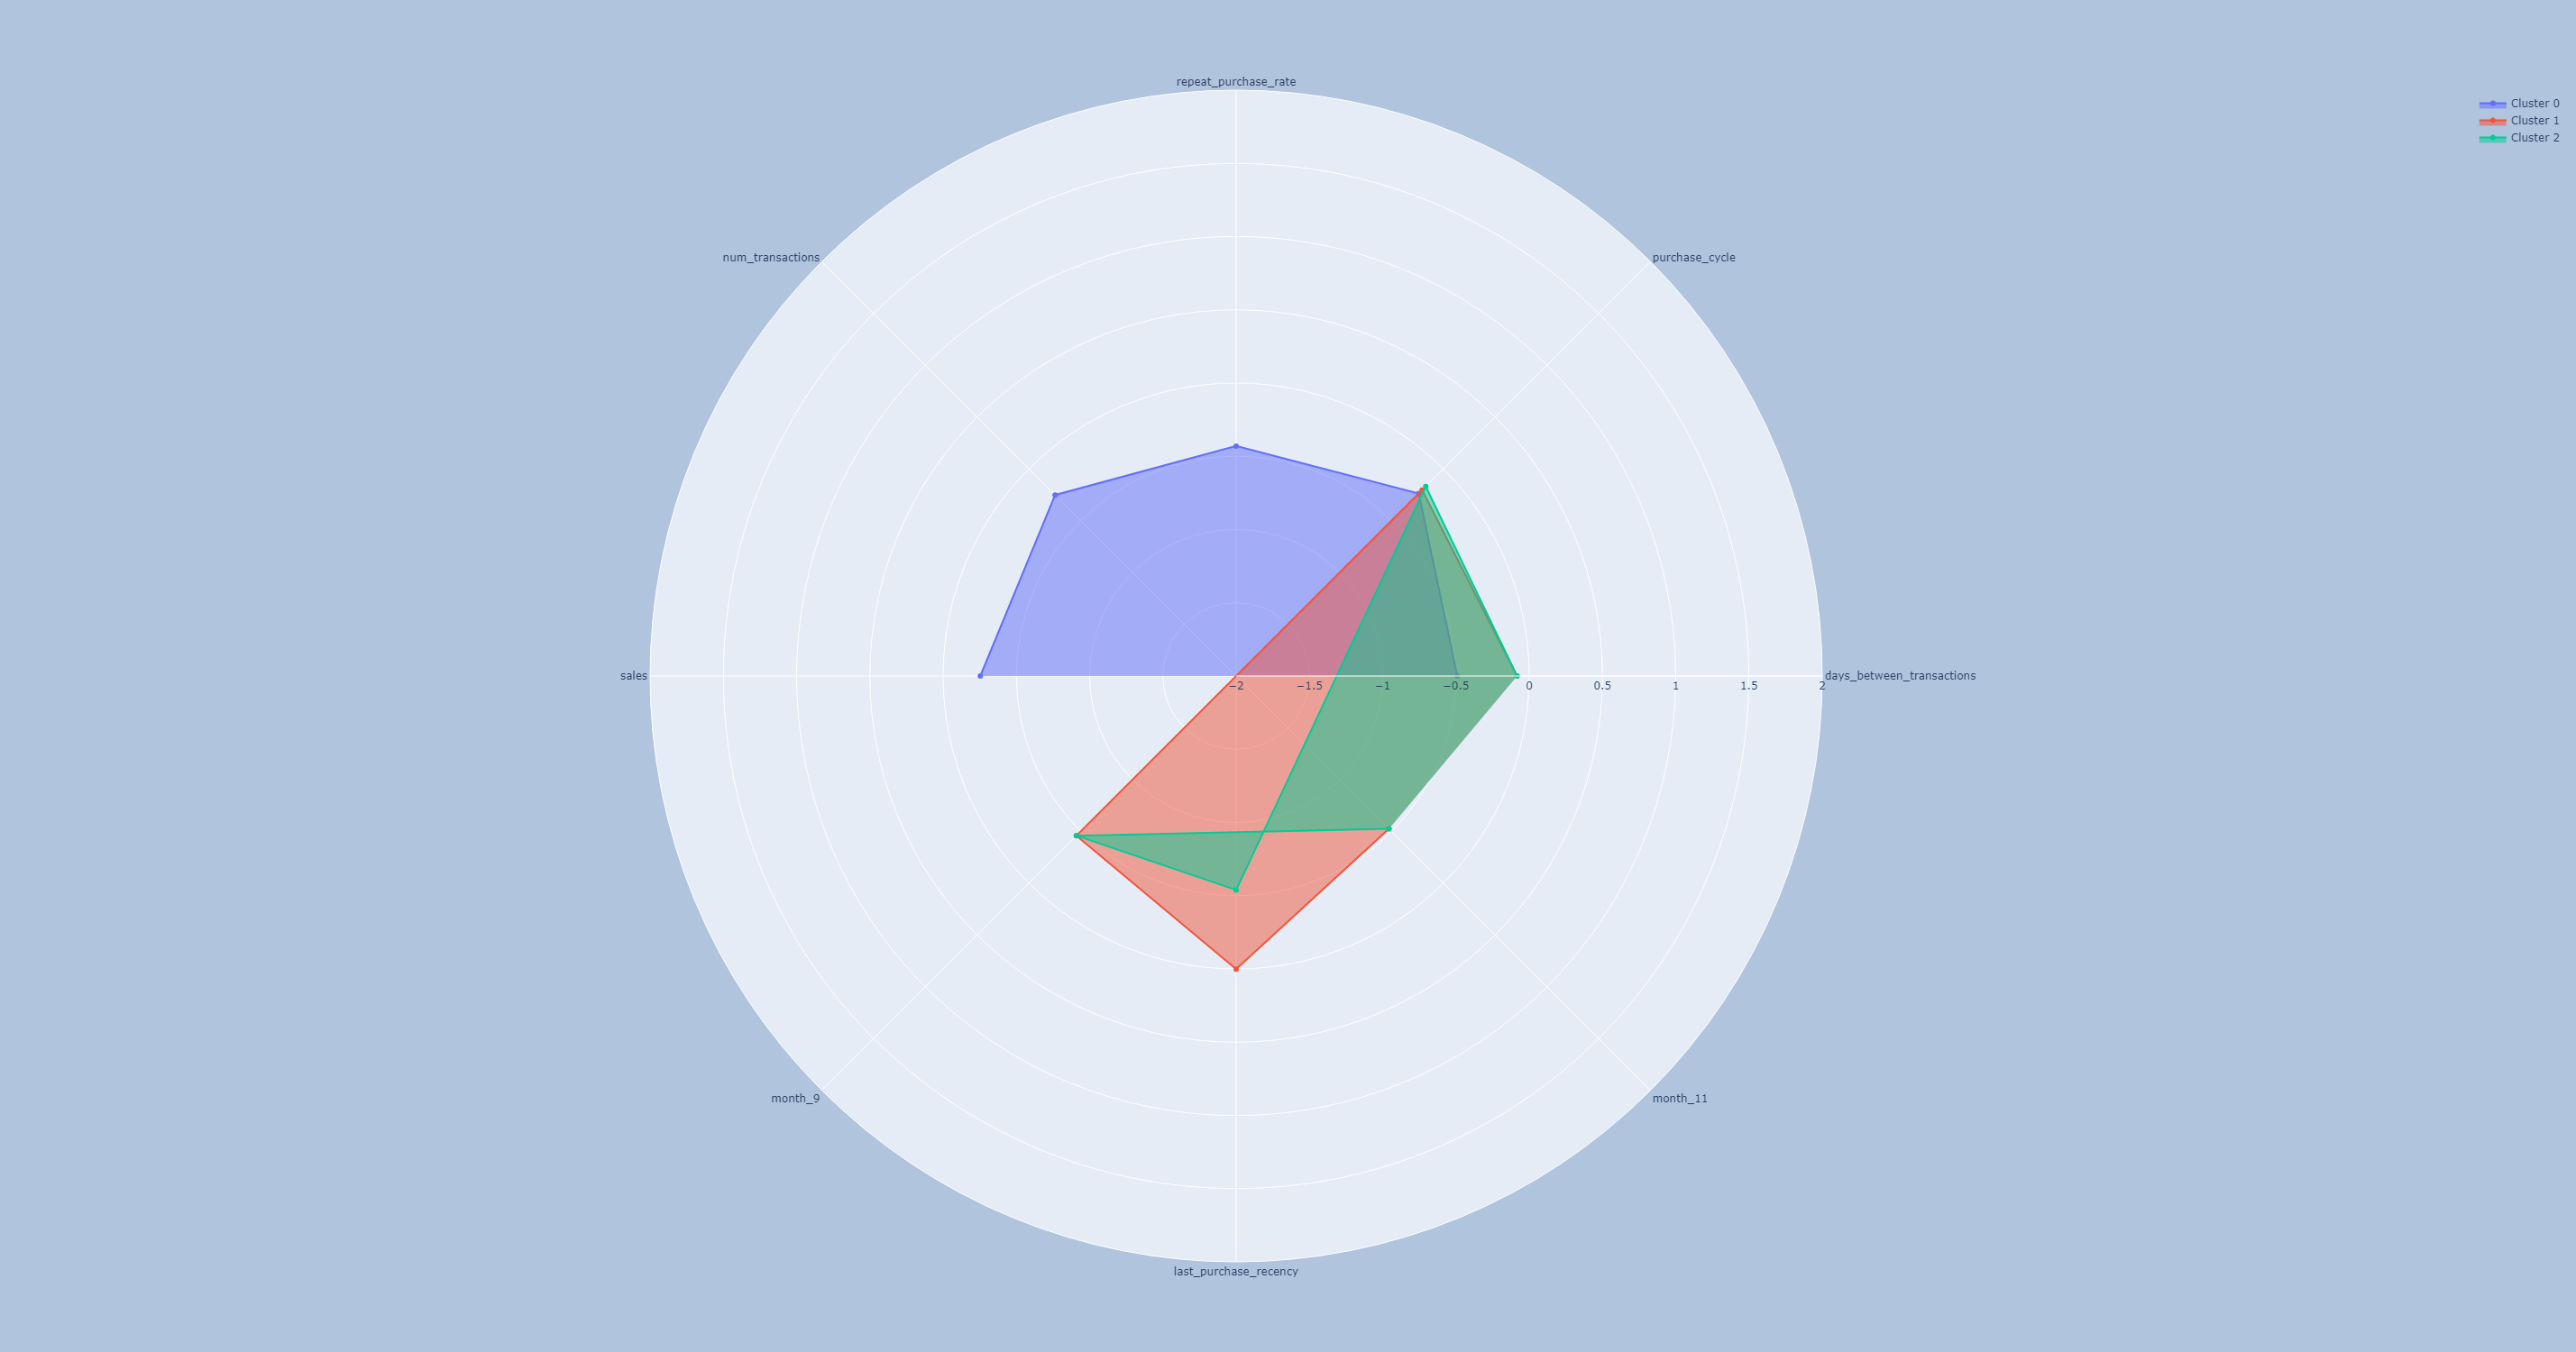

In [146]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=segmented_data_ornaments_scaled_final[segmented_data_ornaments_final.cluster == 0].filter(segmented_data_ornaments_feat_imps[segmented_data_ornaments_feat_imps.cluster==0]['feature'], axis=1).median().values.tolist(),
      theta=segmented_data_ornaments_feat_imps[segmented_data_ornaments_feat_imps.cluster==0]['feature'],
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=segmented_data_ornaments_scaled_final[segmented_data_ornaments_final.cluster == 1].filter(segmented_data_ornaments_feat_imps[segmented_data_ornaments_feat_imps.cluster==1]['feature'], axis=1).median().values.tolist(),
      theta=segmented_data_ornaments_feat_imps[segmented_data_ornaments_feat_imps.cluster==1]['feature'],
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=segmented_data_ornaments_scaled_final[segmented_data_ornaments_final.cluster == 2].filter(segmented_data_ornaments_feat_imps[segmented_data_ornaments_feat_imps.cluster==2]['feature'], axis=1).median().values.tolist(),
      theta=segmented_data_ornaments_feat_imps[segmented_data_ornaments_feat_imps.cluster==2]['feature'],
      fill='toself',
      name='Cluster 2'
))


fig.update_layout(
    autosize=False,
    width=1500,
    height=1500,
    margin=dict(
    l=50,
    r=50,
    b=100,
    t=100,
    pad=4
    ),
    paper_bgcolor="LightSteelBlue",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2]
    )),
  showlegend=True
)

fig.show()

In [155]:
print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].num_transactions.median()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].num_transactions.median()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].num_transactions.median()))

print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].repeat_purchase_rate.median()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].repeat_purchase_rate.median()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].repeat_purchase_rate.median()))

print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].sales.median()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].sales.median()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].sales.median()))

print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].purchase_cycle.median()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].purchase_cycle.median()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].purchase_cycle.median()))

print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].days_between_transactions.median()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].days_between_transactions.median()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].days_between_transactions.median()))

print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].month_11.count()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].month_11.count()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].month_11.count()))

print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].last_purchase_recency.median()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].last_purchase_recency.median()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].last_purchase_recency.median()))

print('Cluster 0: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==0].month_9.count()))
print('Cluster 1: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1].month_9.count()))
print('Cluster 2: {}'.format(segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==2].month_9.count()))

Cluster 0: 1.0
Cluster 1: 4.0
Cluster 2: 3.0
Cluster 0: 0.0
Cluster 1: 100.0
Cluster 2: 100.0
Cluster 0: 57.15
Cluster 1: 236.99
Cluster 2: 286.03999999999996
Cluster 0: 299.0
Cluster 1: 42.0
Cluster 2: 68.0
Cluster 0: 299.0
Cluster 1: 42.0
Cluster 2: 68.0
Cluster 0: 1572
Cluster 1: 1175
Cluster 2: 1200
Cluster 0: 4392.0
Cluster 1: 4343.0
Cluster 2: 4308.0
Cluster 0: 1572
Cluster 1: 1175
Cluster 2: 1200


In [111]:
segmented_data_ornaments_final[segmented_data_ornaments_final.cluster==1]

customerid  quantity     sales  num_transactions  purchase_cycle  \
1574     12352.0  2.076724 -0.537484         -0.252542       -0.227139   
1575     12356.0 -0.447708  0.463200         -0.252542        0.009022   
1578     12360.0 -0.447708 -0.507842         -0.252542       -0.225085   
1580     12363.0 -0.447708 -0.396170         -0.252542       -0.175800   
1584     12381.0 -0.447708 -0.299740         -0.252542       -0.158344   
...          ...       ...       ...               ...             ...   
3935     18248.0 -0.447708  0.285429         -0.252542       -0.079282   
3938     18259.0  0.814508 -0.312684         -0.252542       -0.200443   
3939     18260.0 -0.447708  0.659584         -0.252542        0.450540   
3941     18263.0 -0.447708  0.244247         -0.252542        0.197950   
3942     18265.0  0.814508 -0.364461         -0.252542       -0.216871   

      total_spending  avg_transaction_value  largest_transaction_value  \
1574       -0.406618              -0.582856                   0.781257   
1575       -0.406618               0.857119                   0.781257   
1578       -0.406618              -0.402398                   0.781257   
1580       -0.406618              -0.137237                   0.781257   
1584       -0.406618              -0.251404                   0.781257   
...              ...                    ...                        ...   
3935       -0.406618               0.382038                   0.781257   
3938       -0.406618              -0.402398                   0.781257   
3939       -0.406618               0.892474                   0.781257   
3941        1.123336               1.026528                   0.781257   
3942        1.123336              -0.358205                   0.781257   

      total_quantity  avg_quantity_per_transaction  ...     day_3     day_4  \
1574        0.378521                      0.375750  ... -1.074323 -0.454781   
1575       -0.459405                      0.375750  ... -0.654678 -0.454781   
1578       -0.459405                      0.375750  ... -0.588851  0.348720   
1580       -0.459405                      0.375750  ... -0.226804  1.152221   
1584        0.378521                      0.375750  ... -0.843929  0.348720   
...              ...                           ...  ...       ...       ...   
3935       -0.459405                      0.375750  ... -0.794559  0.348720   
3938        0.378521                     -1.552841  ...  0.089986 -0.454781   
3939       -0.459405                      0.375750  ... -1.037295  0.348720   
3941        0.378521                      0.375750  ... -0.387257  0.348720   
3942       -0.459405                      0.375750  ... -0.613536  0.348720   

         day_6  txn_time_bw_13_16  txn_time_bw_17_20  txn_time_bw_5_8  \
1574 -0.187544          -0.356837          -1.074323        -0.403799   
1575 -0.064531           0.412293          -0.654678        -0.403799   
1578 -0.231956          -0.377983          -0.588851        -0.403799   
1580 -0.212702          -0.276249          -0.226804        -0.403799   
1584 -0.163199          -0.101503          -0.843929         0.542073   
...        ...                ...                ...              ...   
3935 -0.095182           0.202603          -0.794559        -0.403799   
3938 -0.166547          -0.254974           0.089986         0.542073   
3939  0.316063           0.454843          -1.037295        -0.403799   
3941 -0.022510          -0.007408          -0.387257        -0.403799   
3942 -0.207235          -0.309451          -0.613536        -0.403799   

      txn_time_bw_9_12  description  dist_dept_cnt  cluster  
1574          1.043481    -0.239756      -0.416881        1  
1575          0.284568     0.068893       0.348435        1  
1578         -0.474344     0.068893       0.348435        1  
1580         -0.474344    -0.239756      -0.416881        1  
1584         -0.474344     0.068893       0.348435        1  
...                ...        

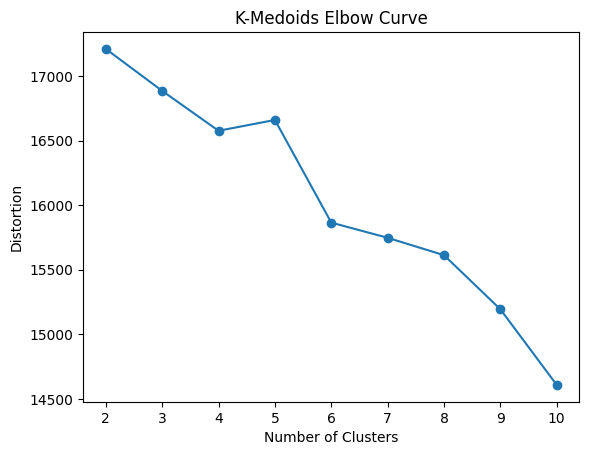

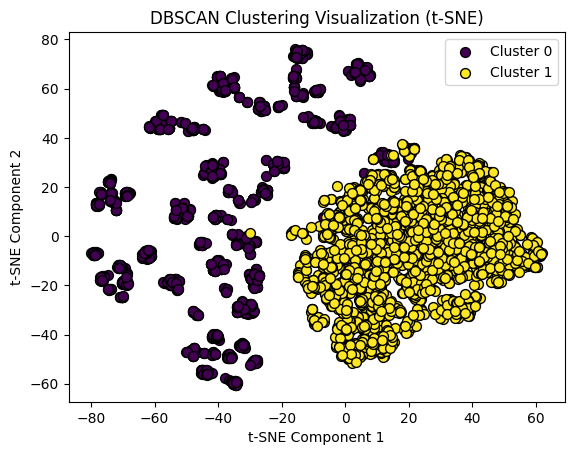

In [157]:
cluster_creation_obj_he = CustomerClustering(data_vf[data_vf.department == 'home_essentials'])
segmented_data_he, segmented_data_he_scaled = cluster_creation_obj_he.perform_customer_segmentation('kmedoids','y')

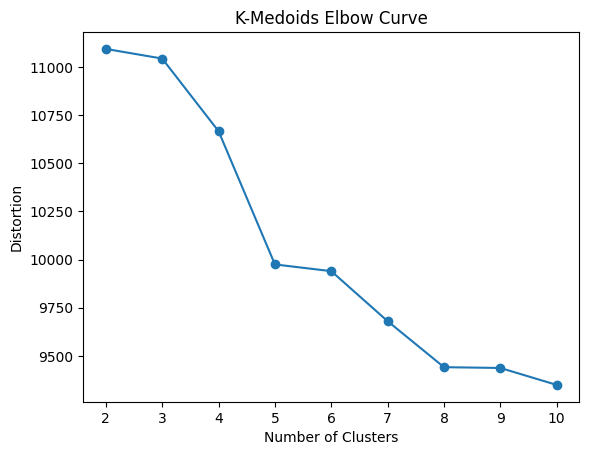

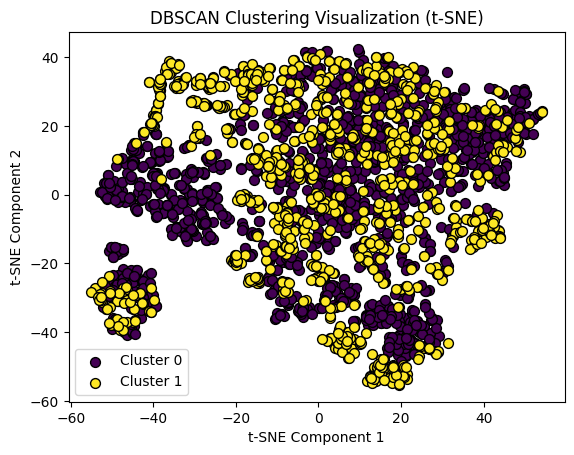

In [158]:
cluster_creation_obj_he_clust_1 = CustomerClustering(segmented_data_he[segmented_data_he.cluster == 1].drop(['cluster'],axis=1))
segmented_data_he_clust_1, segmented_data_he_scaled_clust_1 = cluster_creation_obj_he_clust_1.perform_customer_segmentation('kmedoids','n')

In [159]:
# segmented_data_ornaments_clust_1.head()
# segmented_data_ornaments_scaled_clust_1.cluster.value_counts()
# segmented_data_ornaments_clust_1, segmented_data_ornaments_scaled_clust_1
segmented_data_he_scaled_clust_1['cluster'] =  segmented_data_he_scaled_clust_1['cluster'].map({0:2,1:1})

segmented_data_he_clust_1['cluster'] =  segmented_data_he_clust_1['cluster'].map({0:2,1:1})
segmented_data_he_clust_1.cluster.value_counts()

cluster
2    1424
1    1010
Name: count, dtype: int64

In [160]:
# Reset the index of the union DataFrame
segmented_data_he_final = pd.concat([segmented_data_he[segmented_data_he.cluster==0],segmented_data_he_clust_1]).reset_index(drop=True)
segmented_data_he_scaled_final = pd.concat([segmented_data_he_scaled[segmented_data_he_scaled.cluster==0],segmented_data_he_scaled_clust_1]).reset_index(drop=True)
segmented_data_he_final.head()

customerid  quantity    sales  num_transactions  purchase_cycle  \
0     12349.0       247   485.49               1.0           299.0   
1     12353.0         8    37.60               1.0           299.0   
2     12354.0        65   144.15               1.0           299.0   
3     12355.0       170   313.50               1.0           299.0   
4     12357.0       915  2151.46               1.0           299.0   

   total_spending  avg_transaction_value  largest_transaction_value  \
0          485.49                 485.49                     485.49   
1           37.60                  37.60                      37.60   
2          144.15                 144.15                     144.15   
3          313.50                 313.50                     313.50   
4         2151.46                2151.46                    2151.46   

   total_quantity  avg_quantity_per_transaction  ...  day_3  day_4  day_6  \
0           247.0                         247.0  ...      0      0      0   
1             8.0                           8.0  ...      1      0      0   
2            65.0                          65.0  ...      1      0      0   
3           170.0                         170.0  ...      0      0      0   
4           915.0                         915.0  ...      0      0      1   

   txn_time_bw_13_16  txn_time_bw_17_20  txn_time_bw_5_8  txn_time_bw_9_12  \
0                  0                  0                0                 1   
1                  0                  1                0                 0   
2                  1                  0                0                 0   
3                  1                  0                0                 0   
4                  1                  0                0                 0   

   description  dist_dept_cnt  cluster  
0           73              4        0  
1            4              2        0  
2           58              4        0  
3           13              2        0  
4          131              4        0  

[5 rows x 39 columns]

In [161]:
segmented_data_he_feat_imps = pd.DataFrame(columns=['cluster','feature','score'])
for cluster_val in list(segmented_data_he_final.cluster.unique()):
    segmented_data_he_feat_imps = pd.concat([segmented_data_he_feat_imps,cluster_features(segmented_data_he_final,cluster_val)])
segmented_data_he_feat_imps.head()

cluster                    feature  score
0       0  days_between_transactions   0.30
1       0             purchase_cycle   0.20
2       0       repeat_purchase_rate   0.15
3       0           num_transactions   0.11
4       0                      sales   0.05

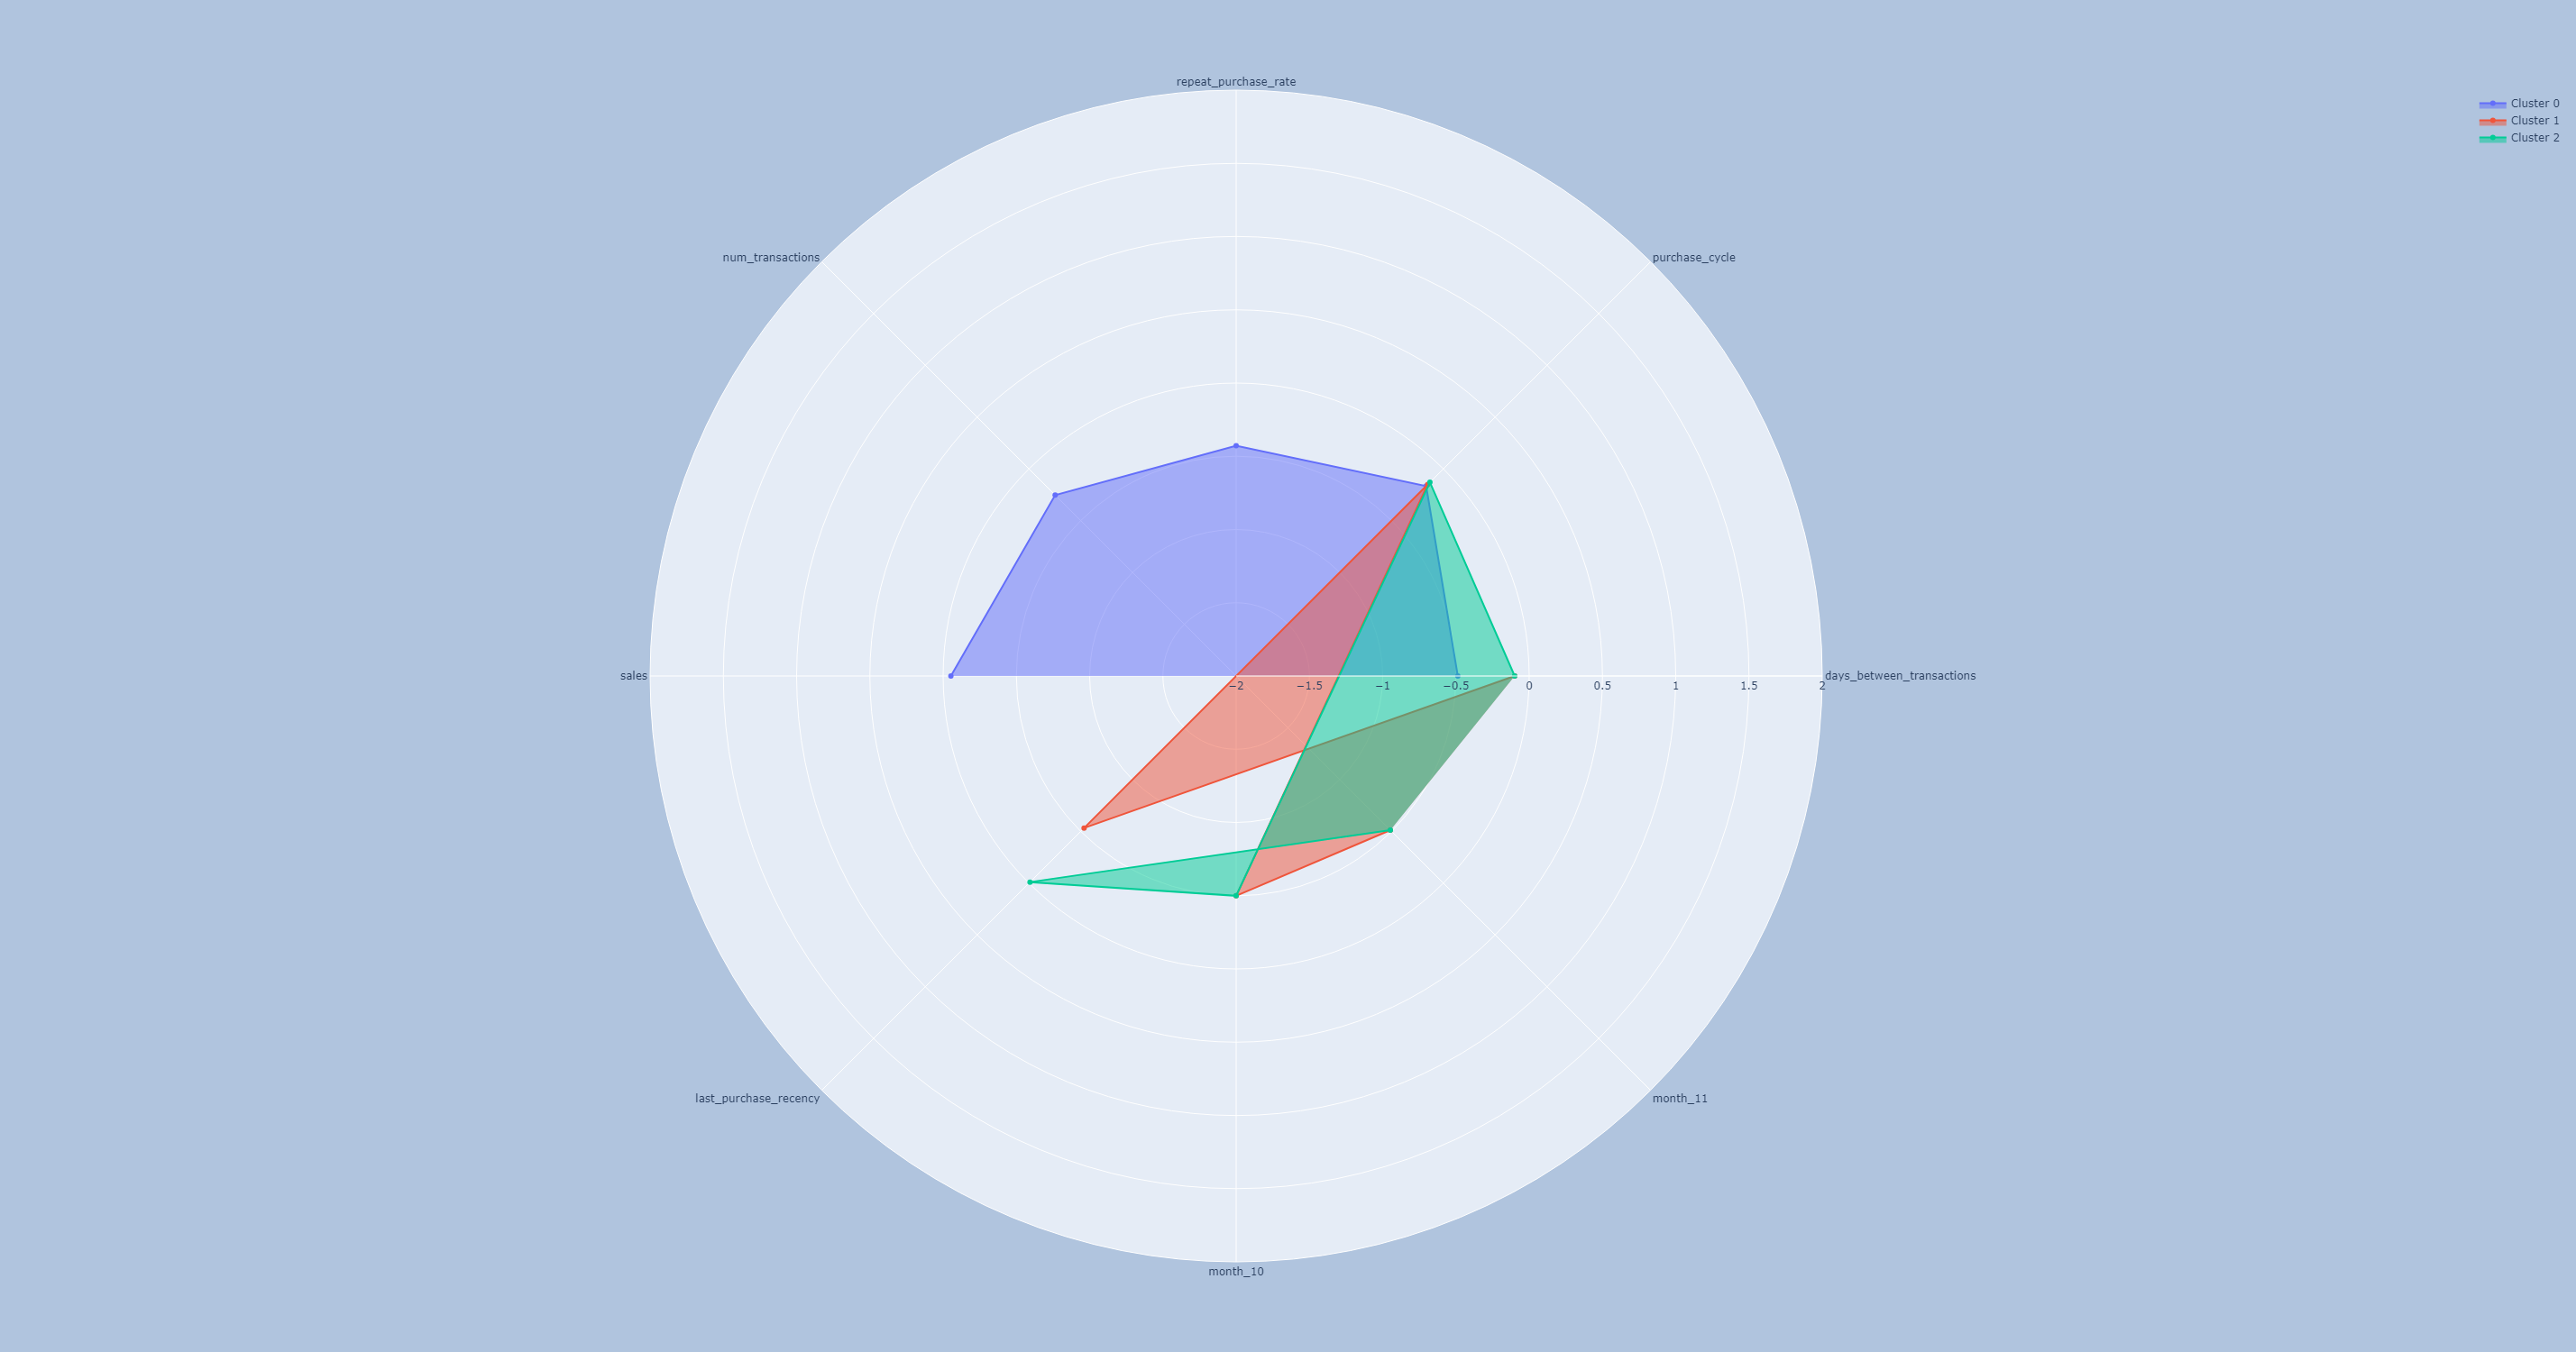

In [163]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=segmented_data_he_scaled_final[segmented_data_he_scaled_final.cluster == 0].filter(segmented_data_he_feat_imps[segmented_data_he_feat_imps.cluster==0]['feature'], axis=1).median().values.tolist(),
      theta=segmented_data_he_feat_imps[segmented_data_he_feat_imps.cluster==0]['feature'],
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=segmented_data_he_scaled_final[segmented_data_he_scaled_final.cluster == 1].filter(segmented_data_he_feat_imps[segmented_data_he_feat_imps.cluster==1]['feature'], axis=1).median().values.tolist(),
      theta=segmented_data_he_feat_imps[segmented_data_he_feat_imps.cluster==1]['feature'],
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=segmented_data_he_scaled_final[segmented_data_he_scaled_final.cluster == 2].filter(segmented_data_he_feat_imps[segmented_data_he_feat_imps.cluster==2]['feature'], axis=1).median().values.tolist(),
      theta=segmented_data_he_feat_imps[segmented_data_he_feat_imps.cluster==2]['feature'],
      fill='toself',
      name='Cluster 2'
))


fig.update_layout(
    autosize=False,
    width=1500,
    height=1500,
    margin=dict(
    l=50,
    r=50,
    b=100,
    t=100,
    pad=4
    ),
    paper_bgcolor="LightSteelBlue",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2]
    )),
  showlegend=True
)

fig.show()

In [164]:
print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].num_transactions.median()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].num_transactions.median()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].num_transactions.median()))

print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].repeat_purchase_rate.median()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].repeat_purchase_rate.median()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].repeat_purchase_rate.median()))

print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].sales.median()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].sales.median()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].sales.median()))

print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].purchase_cycle.median()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].purchase_cycle.median()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].purchase_cycle.median()))

print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].days_between_transactions.median()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].days_between_transactions.median()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].days_between_transactions.median()))

print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].month_11.count()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].month_11.count()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].month_11.count()))

print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].last_purchase_recency.median()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].last_purchase_recency.median()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].last_purchase_recency.median()))

print('Cluster 0: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==0].month_9.count()))
print('Cluster 1: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==1].month_9.count()))
print('Cluster 2: {}'.format(segmented_data_he_final[segmented_data_he_final.cluster==2].month_9.count()))

Cluster 0: 1.0
Cluster 1: 3.0
Cluster 2: 4.0
Cluster 0: 0.0
Cluster 1: 100.0
Cluster 2: 100.0
Cluster 0: 69.6
Cluster 1: 282.96500000000003
Cluster 2: 371.6
Cluster 0: 299.0
Cluster 1: 72.0
Cluster 2: 41.0
Cluster 0: 299.0
Cluster 1: 72.0
Cluster 2: 41.0
Cluster 0: 1614
Cluster 1: 1010
Cluster 2: 1424
Cluster 0: 4399.0
Cluster 1: 4307.0
Cluster 2: 4339.0
Cluster 0: 1614
Cluster 1: 1010
Cluster 2: 1424


In [ ]:
# #Train-Validation-test split
# split_perc = 0.20
# X = data_enc[list(set(list(data_enc.columns)) - set([target]) - set([identifier]))]
# Y = data_enc[target]

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = split_perc, random_state = 41)

# print(colored("\nTrain-validation-test split has been performed\n", 'green', attrs = ['bold']))
# print(colored("\nTraining-Test split percentage:", 'magenta', attrs = ['bold']), colored("\t{}:{} (%)", 'blue', attrs = ['bold']).format(int((1-split_perc)*100), int(split_perc*100)))
# print(colored("\nTotal Observations:", 'magenta', attrs = ['bold']), colored("\t{} ", 'blue', attrs=['bold']).format(X.shape[0]))
# print(colored("\nTotal Independent Features:", 'magenta', attrs = ['bold']), colored("\t{} ", 'blue', attrs=['bold']).format(X.shape[1]))
# print(colored("\Training Observations:", 'magenta', attrs = ['bold']), colored("\t{} ", 'blue', attrs=['bold']).format(X_train.shape[0]))
# print(colored("\nTest Observations:", 'magenta', attrs = ['bold']), colored("\t{} ", 'blue', attrs=['bold']).format(X_test.shape[0]))

In [ ]:
X_train = data_enc.loc[:, data_enc.columns != "saleprice"]
Y_train = data_enc['saleprice']

In [ ]:
# Checking distribution of dependent variable

#PLot Histogram for 'SalePrice'
sns.distplot(data_enc['saleprice'])


num_desc_dep = pd.DataFrame(data_enc.describe().T)
num_desc_dep.insert(loc=5,column='IQR',value = (num_desc_dep['75%']-num_desc_dep['25%']))
num_desc_dep.drop(['25%','50%','75%'],axis=1,inplace=True)

num_desc_dep['skewness'] = data[num_cols].skew()
num_desc_dep['kurtosis'] = data[num_cols].kurt()
num_desc_dep.insert(loc=0, column='columns', value=num_desc_dep.index)
num_desc_dep.insert(loc=3, column = 'median', value=data_enc['saleprice'].median())
num_desc_dep = num_desc_dep.round(4)
vis_data(num_desc_dep[num_desc_dep['columns'] == 'saleprice'])


In [ ]:
#Since it has high skewness and kurtosis too, adding a log transformation

Y_train = np.log(Y_train)
print("Skewness : %f" % Y_train.skew())
print("Kurtosis : %f" % Y_train.kurt())
sns.distplot(Y_train)